In [ ]:
pip install missingno 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
ls

sample_data/  tot_kdd.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [3]:
df=pd.read_csv('tot_kdd.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898430 entries, 0 to 4898429
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [4]:
cat_col=["protocol_type","service","flag","label"]
for v in df.columns:
    if not v in cat_col:
        df[v]=pd.to_numeric(df[v])

In [5]:
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)


In [6]:
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

In [7]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rat,label
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898430 entries, 0 to 4898429
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int32  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int32  
 5   dst_bytes                    int32  
 6   land                         int32  
 7   wrong_fragment               int32  
 8   urgent                       int32  
 9   hot                          int32  
 10  num_failed_logins            int32  
 11  logged_in                    int32  
 12  num_compromised              int32  
 13  root_shell                   int32  
 14  su_attempted                 int32  
 15  num_root                     int32  
 16  num_file_creations           int32  
 17  num_shells                   int32  
 18  num_access_files             int32  
 19  

In [9]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rat
count,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,...,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06
mean,4.834244e+01,1.834622e+03,1.093614e+03,5.716117e-06,6.487793e-04,7.961735e-06,1.243766e-02,3.205109e-05,1.435288e-01,8.088306e-03,...,2.329811e+02,1.892143e+02,7.537134e-01,3.071111e-02,6.050520e-01,6.464109e-03,1.780912e-01,1.778859e-01,5.792781e-02,5.765942e-02
std,7.233299e+02,9.414312e+05,6.450124e+05,2.390834e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506114e-01,3.856481e+00,...,6.402086e+01,1.059127e+02,4.111859e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821775e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


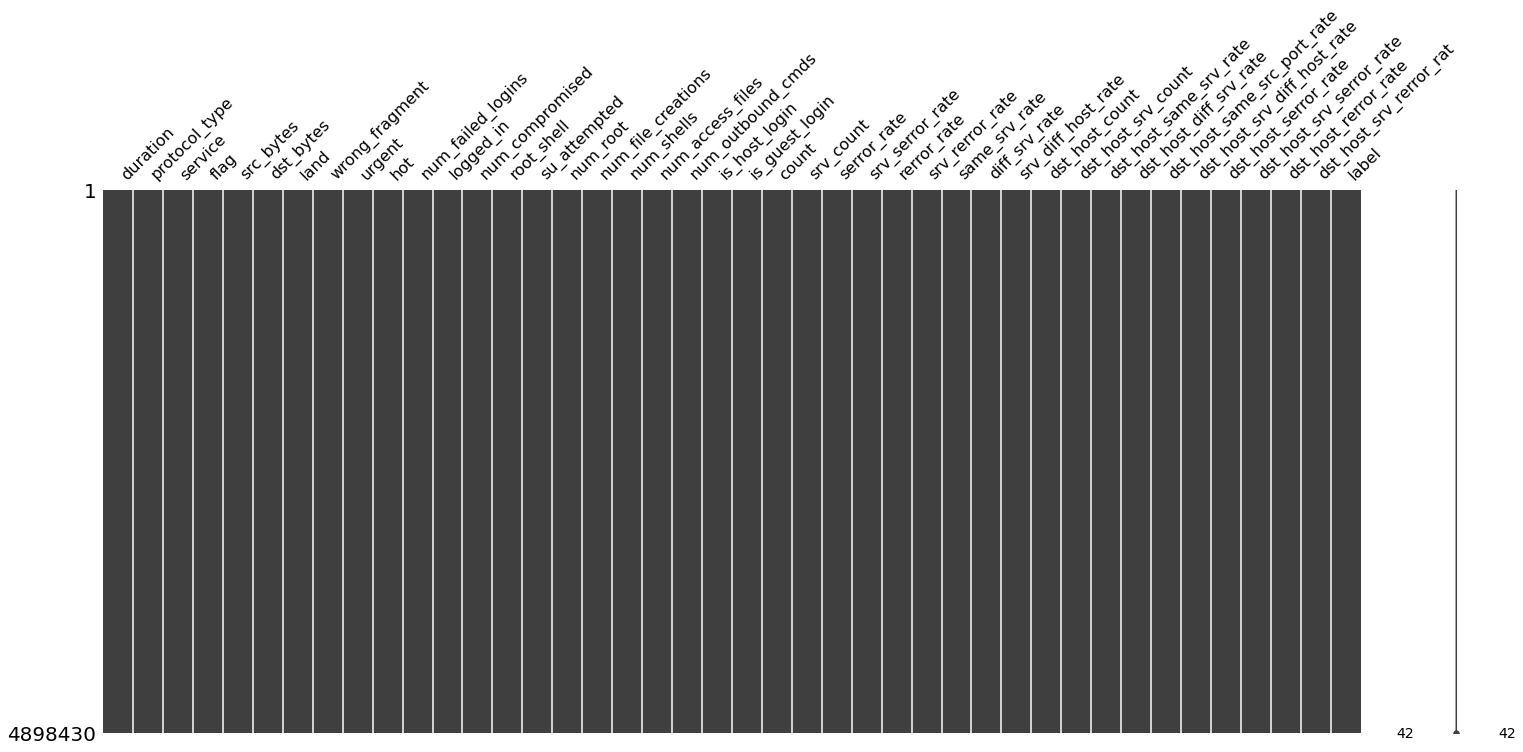

In [33]:
msno.matrix(df)

In [11]:
num_col=[]
for v in df.columns:
    if not v in cat_col:
        num_col.append(v)

In [4]:
num_col=['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'lnum_compromised',
 'lroot_shell',
 'lsu_attempted',
 'lnum_root',
 'lnum_file_creations',
 'lnum_shells',
 'lnum_access_files',
 'lnum_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [ ]:
#top 10 stdc
stval=df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
val=stval.to_dict()

In [ ]:
val=dict(sorted(val.items(), key=lambda item: item[1],reverse=True))

In [19]:
val={'src_bytes': 988219.1012247463,
 'dst_bytes': 33040.03467172595,
 'duration': 707.7471853280666,
 'srv_count': 246.3227355222279,
 'count': 213.14710672034062,
 'dst_host_srv_count': 106.04020468998293,
 'dst_host_count': 64.74460109429228,
 'lnum_root': 2.012720362601919,
 'lnum_compromised': 1.7983280775888895,
 'hot': 0.7821033719503345,
 'dst_host_same_src_port_rate': 0.4813089668750763,
 'dst_host_same_srv_rate': 0.4107799828052521,
 'same_srv_rate': 0.38818976283073425,
 'srv_serror_rate': 0.38101688027381897,
 'dst_host_srv_serror_rate': 0.38091975450515747,
 'serror_rate': 0.38071727752685547,
 'dst_host_serror_rate': 0.3805934190750122,
 'logged_in': 0.35534304950559575,
 'srv_rerror_rate': 0.2321472018957138,
 'rerror_rate': 0.23162369430065155,
 'dst_host_rerror_rate': 0.23058971762657166,
 'dst_host_srv_rerror_rate': 0.2301405370235443,
 'srv_diff_host_rate': 0.1423969715833664,
 'wrong_fragment': 0.13480538413163565,
 'dst_host_diff_srv_rate': 0.1092592105269432,
 'lnum_file_creations': 0.09641597625620141,
 'diff_srv_rate': 0.08220557123422623,
 'dst_host_srv_diff_host_rate': 0.0421329140663147,
 'is_guest_login': 0.03721106996669842,
 'lnum_access_files': 0.036481726902960226,
 'num_failed_logins': 0.015519612608912128,
 'lnum_shells': 0.011020021347659998,
 'lroot_shell': 0.010550798816426512,
 'lsu_attempted': 0.00779262996298348,
 'land': 0.006673133971526146,
 'urgent': 0.005510263503669807,
 'lnum_outbound_cmds': 0.0,
 'is_host_login': 0.0}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


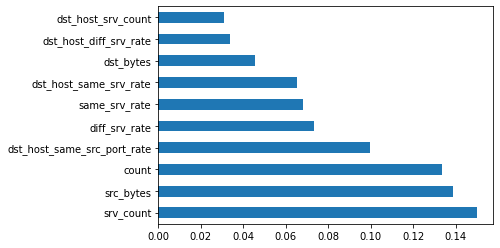

In [ ]:

from sklearn.ensemble import RandomForestClassifier
%matplotlib inline            
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x= df[num_col].copy()
y = df['label']
y=pd.DataFrame(labelencoder.fit_transform(y),columns=['label'])
# print(type(y),type(x),y.shape,x.shape)
model = RandomForestClassifier()
model.fit(x, y)
fval=pd.Series(model.feature_importances_, index=x.columns)
(fval
   .nlargest(10)
   .plot(kind='barh'))

In [ ]:
fval=fval.to_dict()

In [ ]:
fval=dict(sorted(fval.items(), key=lambda item: item[1],reverse=True))

In [10]:
fval={'srv_count': 0.1501800462937829,
 'src_bytes': 0.13856321059767066,
 'count': 0.1335355276287248,
 'dst_host_same_src_port_rate': 0.09964489321108116,
 'diff_srv_rate': 0.0731242075782352,
 'same_srv_rate': 0.06808654019826653,
 'dst_host_same_srv_rate': 0.06516215046387394,
 'dst_bytes': 0.045466784149893344,
 'dst_host_diff_srv_rate': 0.03377647838016473,
 'dst_host_srv_count': 0.030761138117163595,
 'dst_host_count': 0.02808032261485276,
 'logged_in': 0.02326286759708081,
 'serror_rate': 0.02138439294858998,
 'srv_serror_rate': 0.017170213102801594,
 'dst_host_serror_rate': 0.016585579644350253,
 'dst_host_srv_serror_rate': 0.013676014904180855,
 'dst_host_rerror_rate': 0.008558913784573513,
 'dst_host_srv_diff_host_rate': 0.007215177940388785,
 'dst_host_srv_rerror_rate': 0.005390397542784849,
 'lnum_compromised': 0.003508074315986144,
 'wrong_fragment': 0.003504947491140147,
 'rerror_rate': 0.00332925040884966,
 'srv_rerror_rate': 0.0028550765452395282,
 'srv_diff_host_rate': 0.0026235161680823924,
 'hot': 0.00255779336324375,
 'duration': 0.0012999120333598273,
 'is_guest_login': 0.000437604956636385,
 'num_failed_logins': 9.44082940844653e-05,
 'lroot_shell': 4.4203838474793154e-05,
 'lnum_root': 3.587277030240149e-05,
 'lnum_file_creations': 3.0391863381331605e-05,
 'land': 2.5882457496536406e-05,
 'lnum_shells': 1.1937805995953987e-05,
 'lnum_access_files': 9.049247701278516e-06,
 'urgent': 5.365904351646931e-06,
 'lsu_attempted': 1.8558372136057462e-06,
 'lnum_outbound_cmds': 0.0,
 'is_host_login': 0.0}

In [ ]:
mval={}
for v in fval:
  if not v in mval:
    mval[v]=fval[v]*val[v]

In [ ]:
mval=dict(sorted(mval.items(), key=lambda item: item[1],reverse=True))

In [11]:
mval={'src_bytes': 136930.81143964533,
 'dst_bytes': 1502.224124724356,
 'srv_count': 36.99275982393943,
 'count': 28.4627113584368,
 'dst_host_srv_count': 3.261917382440864,
 'dst_host_count': 1.8180492862976763,
 'duration': 0.9200090827845017,
 'dst_host_same_src_port_rate': 0.04795998060580278,
 'dst_host_same_srv_rate': 0.026767307047103388,
 'same_srv_rate': 0.026430497891530336,
 'logged_in': 0.008266298312191606,
 'serror_rate': 0.008141407864951662,
 'srv_serror_rate': 0.006542141030066112,
 'dst_host_serror_rate': 0.006312362464184188,
 'lnum_compromised': 0.006308668540706321,
 'diff_srv_rate': 0.006011217255018959,
 'dst_host_srv_serror_rate': 0.005209464239909446,
 'dst_host_diff_srv_rate': 0.003690391362197164,
 'hot': 0.0020004588141451234,
 'dst_host_rerror_rate': 0.0019735975127749784,
 'dst_host_srv_rerror_rate': 0.0012405489852668988,
 'rerror_rate': 0.0007711332789497128,
 'srv_rerror_rate': 0.0006627980311754378,
 'wrong_fragment': 0.00047248579290436014,
 'srv_diff_host_rate': 0.0003735807572349307,
 'dst_host_srv_diff_host_rate': 0.0003039964721355701,
 'lnum_root': 7.220185525058487e-05,
 'is_guest_login': 1.628374865917055e-05,
 'lnum_file_creations': 2.930261178156185e-06,
 'num_failed_logins': 1.465180151259152e-06,
 'lroot_shell': 4.663858066613563e-07,
 'lnum_access_files': 3.3013218331528343e-07,
 'land': 1.7271710638671867e-07,
 'lnum_shells': 1.3155487691963645e-07,
 'urgent': 2.956754691306308e-08,
 'lsu_attempted': 1.446185267716391e-08,
 'lnum_outbound_cmds': 0.0,
 'is_host_login': 0.0}

In [ ]:
fnum_col=[]
cnt=0
for v in mval:
   if cnt<11:
     print(v)
     fnum_col.append(v)
   cnt+=1

src_bytes
dst_bytes
srv_count
count
dst_host_srv_count
dst_host_count
duration
dst_host_same_src_port_rate
dst_host_same_srv_rate
same_srv_rate
logged_in


In [12]:
fnum_col=['src_bytes',
 'dst_bytes',
 'srv_count',
 'count',
 'dst_host_srv_count',
 'dst_host_count',
 'duration',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'same_srv_rate',
 'logged_in']

In [13]:
pcol=fnum_col+['label']

In [17]:
cmat=df[pcol].corr()

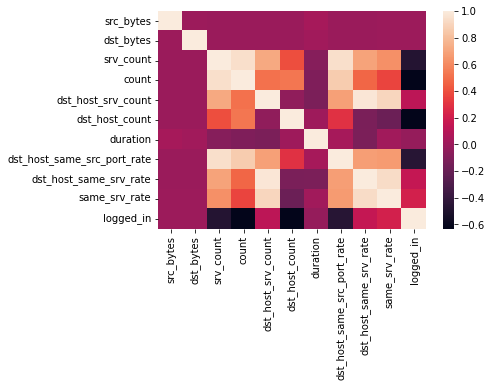

In [18]:
sns.heatmap(cmat);

In [19]:
cmat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, src_bytes to logged_in
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   src_bytes                    11 non-null     float64
 1   dst_bytes                    11 non-null     float64
 2   srv_count                    11 non-null     float64
 3   count                        11 non-null     float64
 4   dst_host_srv_count           11 non-null     float64
 5   dst_host_count               11 non-null     float64
 6   duration                     11 non-null     float64
 7   dst_host_same_src_port_rate  11 non-null     float64
 8   dst_host_same_srv_rate       11 non-null     float64
 9   same_srv_rate                11 non-null     float64
 10  logged_in                    11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB


In [20]:
cmat

,src_bytes,dst_bytes,srv_count,count,dst_host_srv_count,dst_host_count,duration,dst_host_same_src_port_rate,dst_host_same_srv_rate,same_srv_rate,logged_in
src_bytes,1.000000,0.000239,-0.001151,-0.001663,-0.001715,-0.002416,0.041221,-0.000793,-0.001548,0.000670,0.000200
dst_bytes,0.000239,1.000000,-0.001998,-0.002646,-0.001067,-0.001534,0.020392,-0.000558,-0.000968,0.000910,0.002119
srv_count,-0.001151,-0.001998,1.000000,0.943390,0.720588,0.400608,-0.079863,0.947360,0.694597,0.624779,-0.473229
count,-0.001663,-0.002646,0.943390,1.000000,0.514767,0.533589,-0.105074,0.863324,0.475602,0.364258,-0.630937
dst_host_srv_count,-0.001715,-0.001067,0.720588,0.514767,1.000000,-0.040560,-0.117309,0.684259,0.978846,0.907529,0.125517
dst_host_count,-0.002416,-0.001534,0.400608,0.533589,-0.040560,1.000000,0.010914,0.298379,-0.124321,-0.179546,-0.628390
duration,0.041221,0.020392,-0.079863,-0.105074,-0.117309,0.010914,1.000000,0.042774,-0.119105,0.021719,-0.020624
dst_host_same_src_port_rate,-0.000793,-0.000558,0.947360,0.863324,0.684259,0.298379,0.042774,1.000000,0.676093,0.668003,-0.460501
dst_host_same_srv_rate,-0.001548,-0.000968,0.694597,0.475602,0.978846,-0.124321,-0.119105,0.676093,1.000000,0.931622,0.157487
same_srv_rate,0.000670,0.000910,0.624779,0.364258,0.907529,-0.179546,0.021719,0.668003,0.931622,1.000000,0.216537


In [22]:
dst=set()
vlst={}
for index, row in cmat.iterrows():
  flag=1
  for cl in cmat.columns:
    if index==cl:
      flag=0
    if flag and abs(row[cl])>=0.85:
      dst.add(cl)
      vlst[index+","+cl]=abs(row[cl])
dst=list(dst)

In [23]:
vlst=dict(sorted(vlst.items(), key=lambda item: item[1],reverse=True))

In [24]:
vlst

{'dst_host_same_srv_rate,dst_host_srv_count': 0.9788464384863078,
 'dst_host_same_src_port_rate,srv_count': 0.9473596311878091,
 'count,srv_count': 0.9433902139457043,
 'same_srv_rate,dst_host_same_srv_rate': 0.9316219170451187,
 'same_srv_rate,dst_host_srv_count': 0.9075294640962288,
 'dst_host_same_src_port_rate,count': 0.86332416234164}

In [25]:
dst

['srv_count', 'dst_host_same_srv_rate', 'dst_host_srv_count', 'count']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

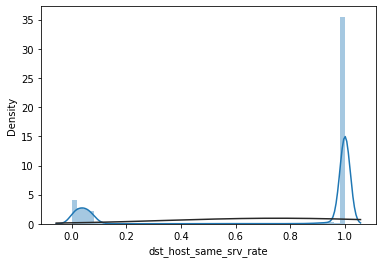

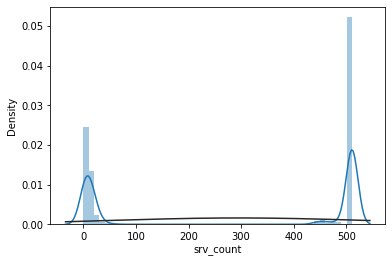

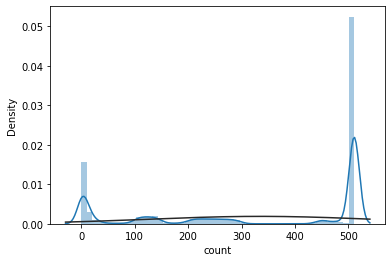

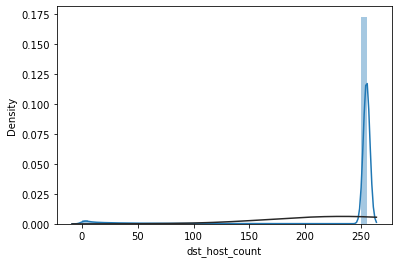

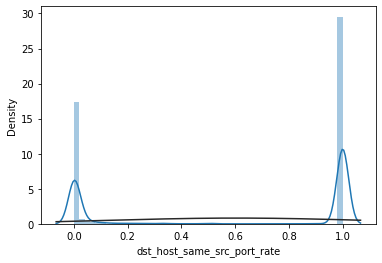

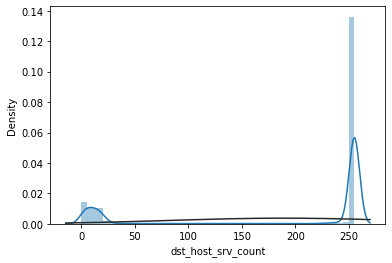

In [30]:
for i,v in enumerate(dst):
  plt.figure(i+1)
  sns.distplot(df[v], fit=st.norm)

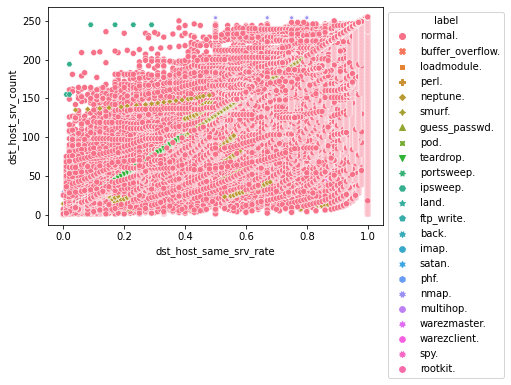

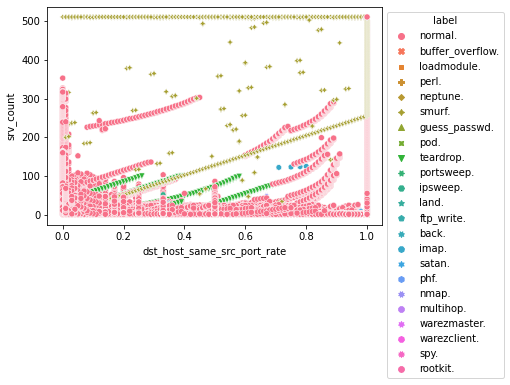

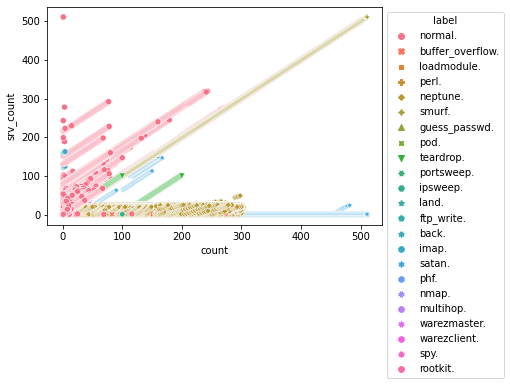

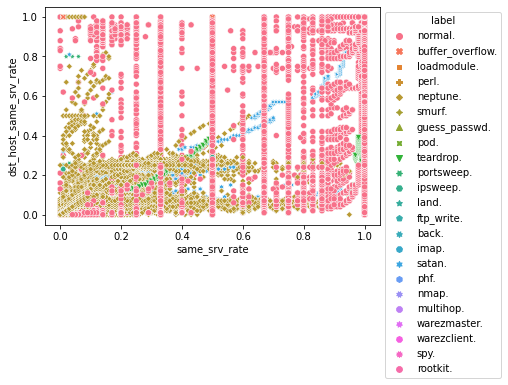

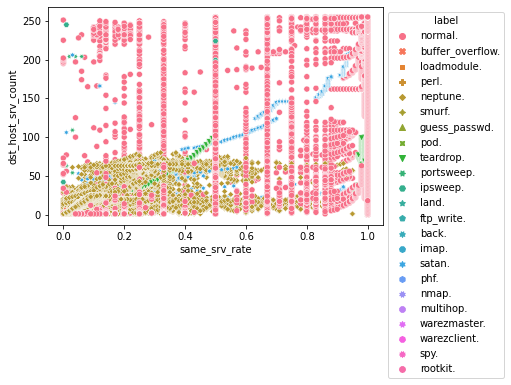

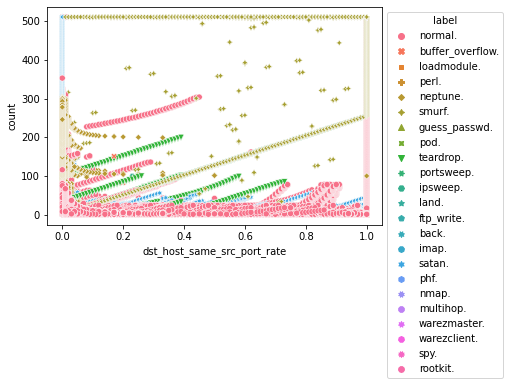

In [27]:
for i,v in enumerate(vlst):
  r,c=tuple(v.split(','))
  # print(r,c)
  plt.figure(i+1)
  ax=sns.scatterplot(data=df, x=r, y=c, sizes=(200, 200),hue="label",style="label")
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [28]:
ul={}
for v in cat_col:
  ul[v]=len(df[v].unique())

In [29]:
cat_col

['protocol_type', 'service', 'flag', 'label']

<Figure size 432x288 with 0 Axes>

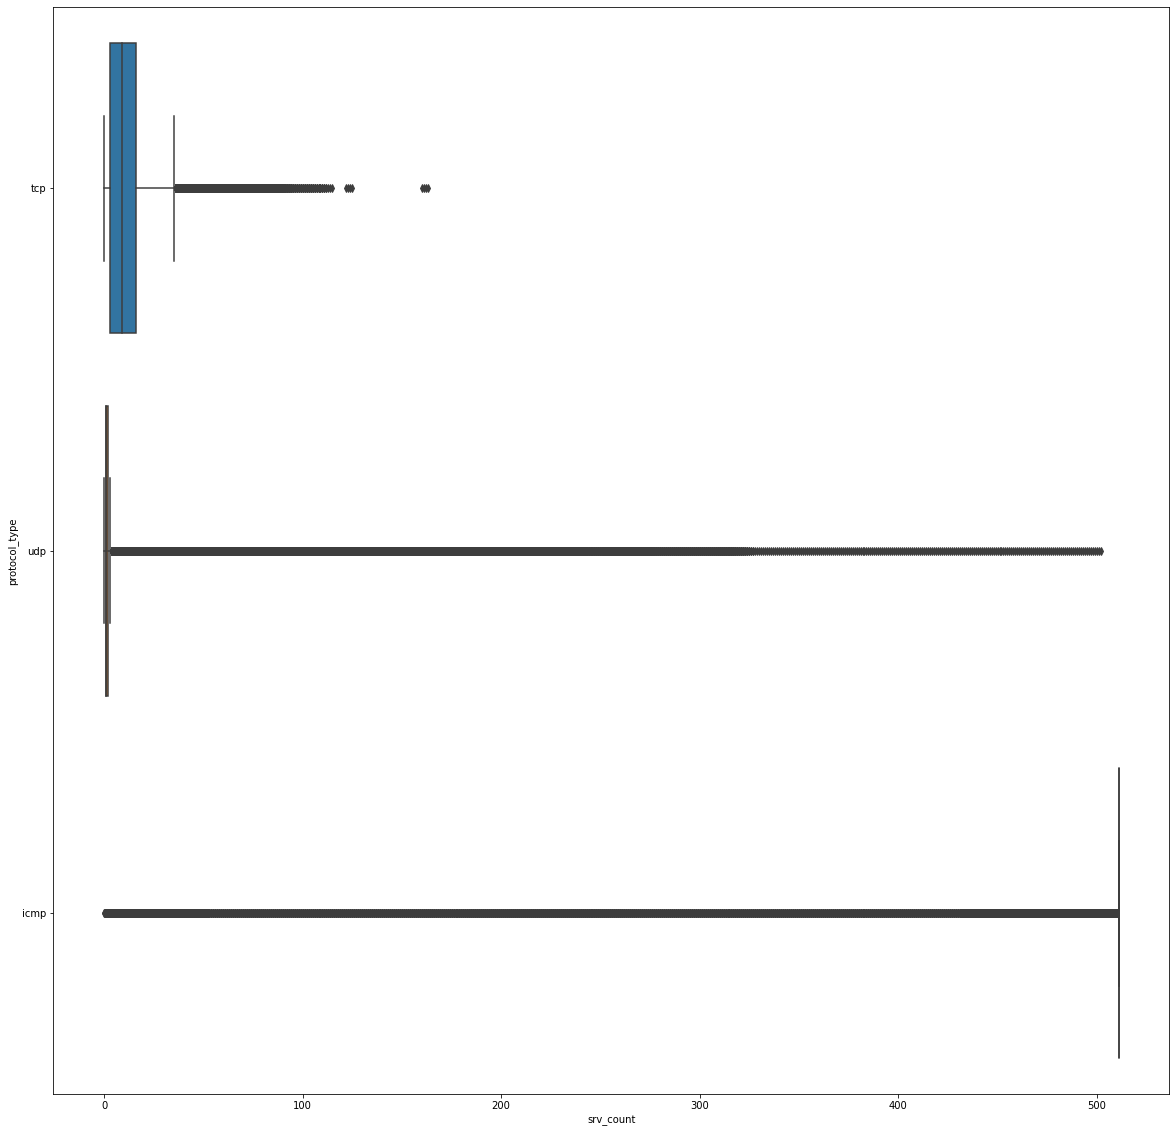

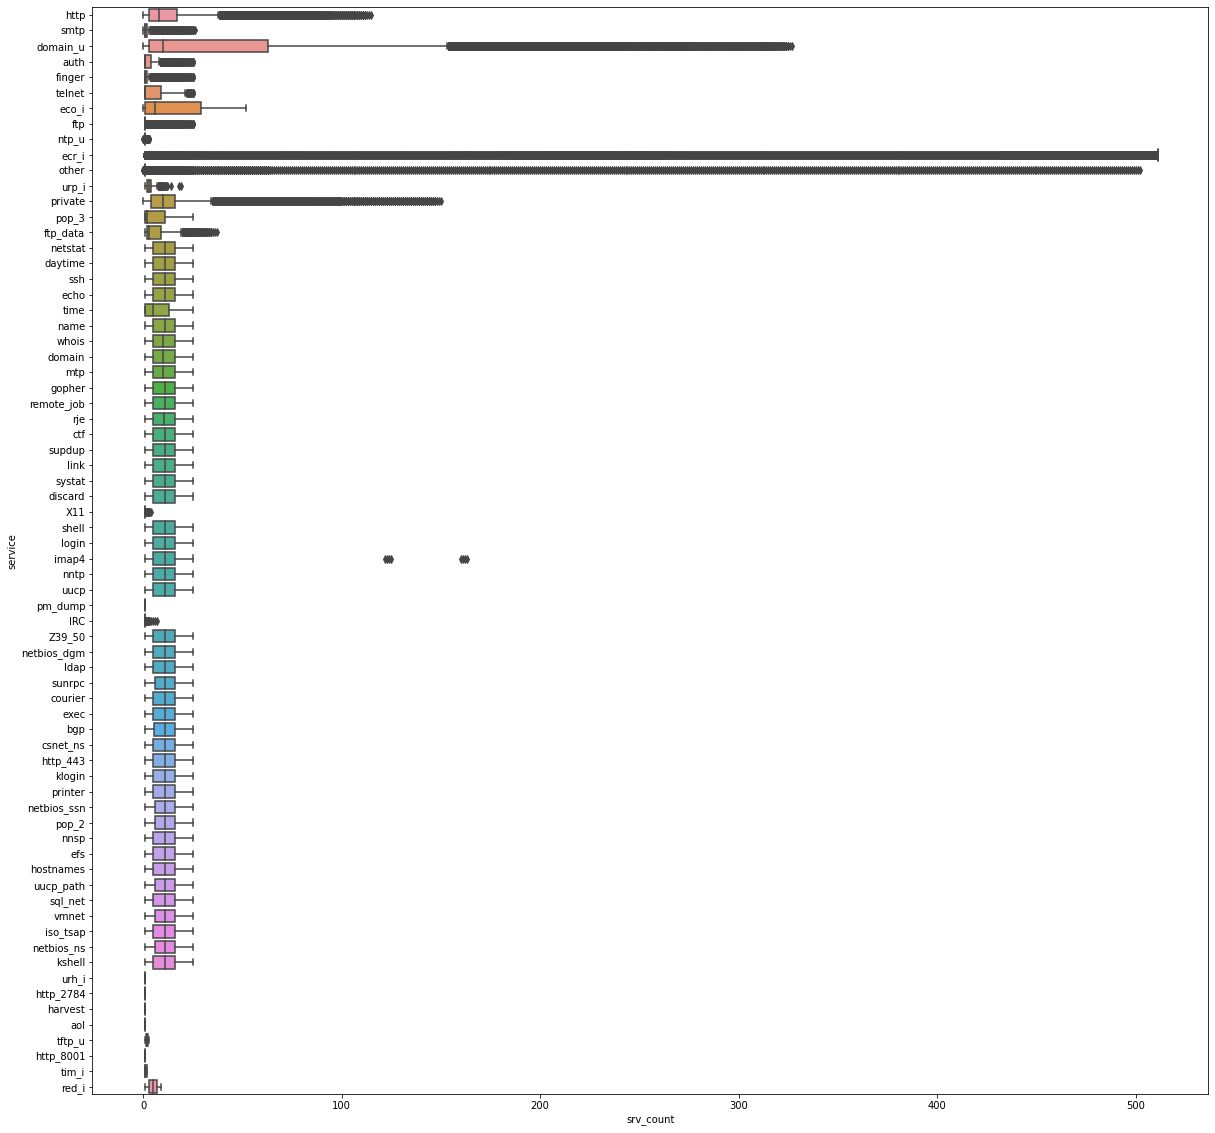

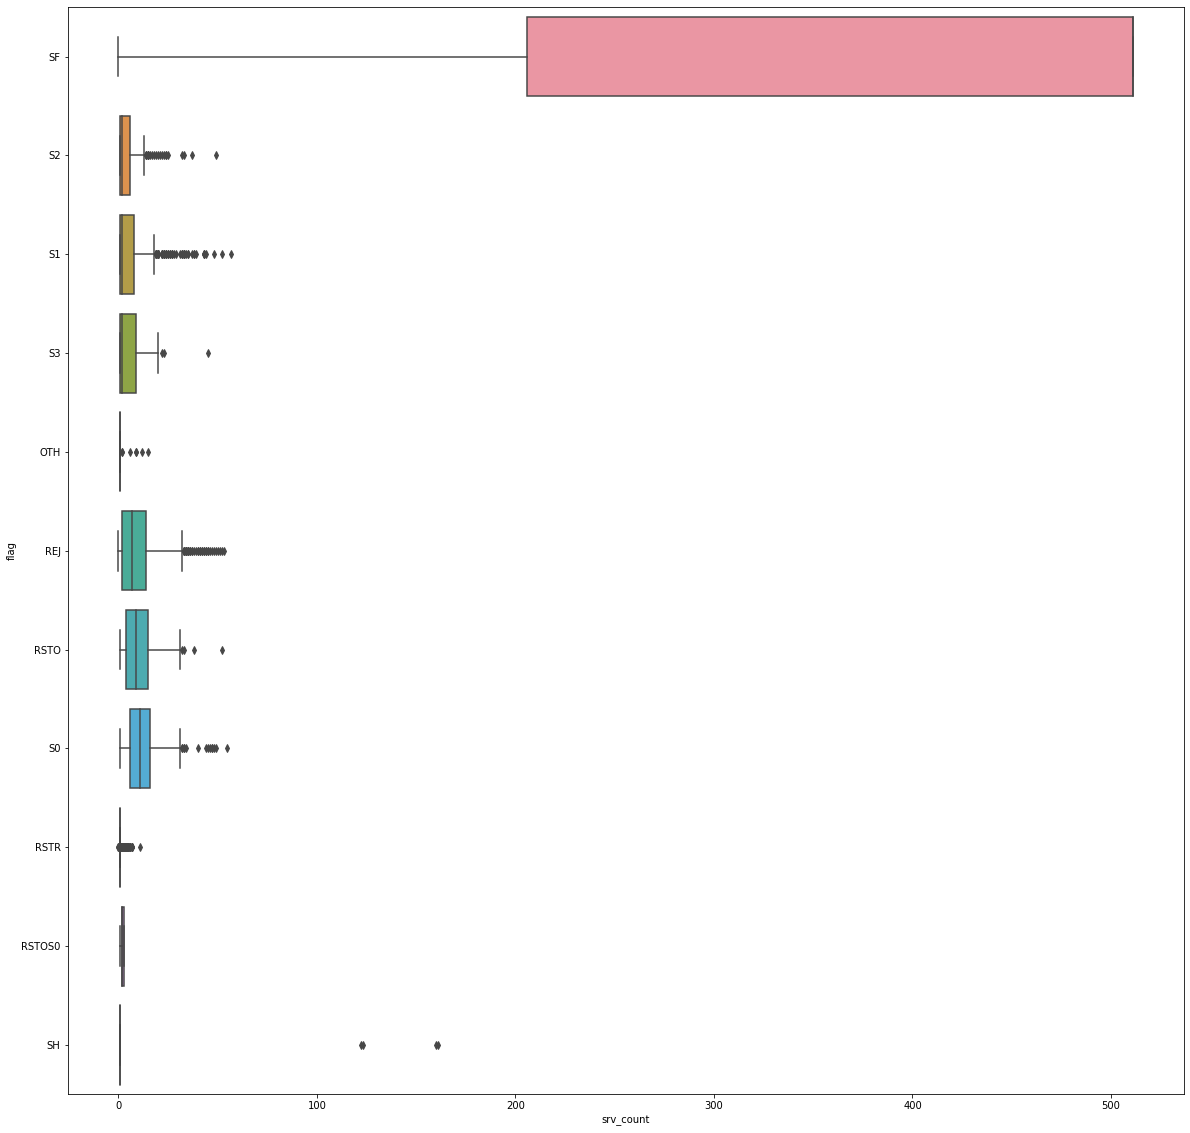

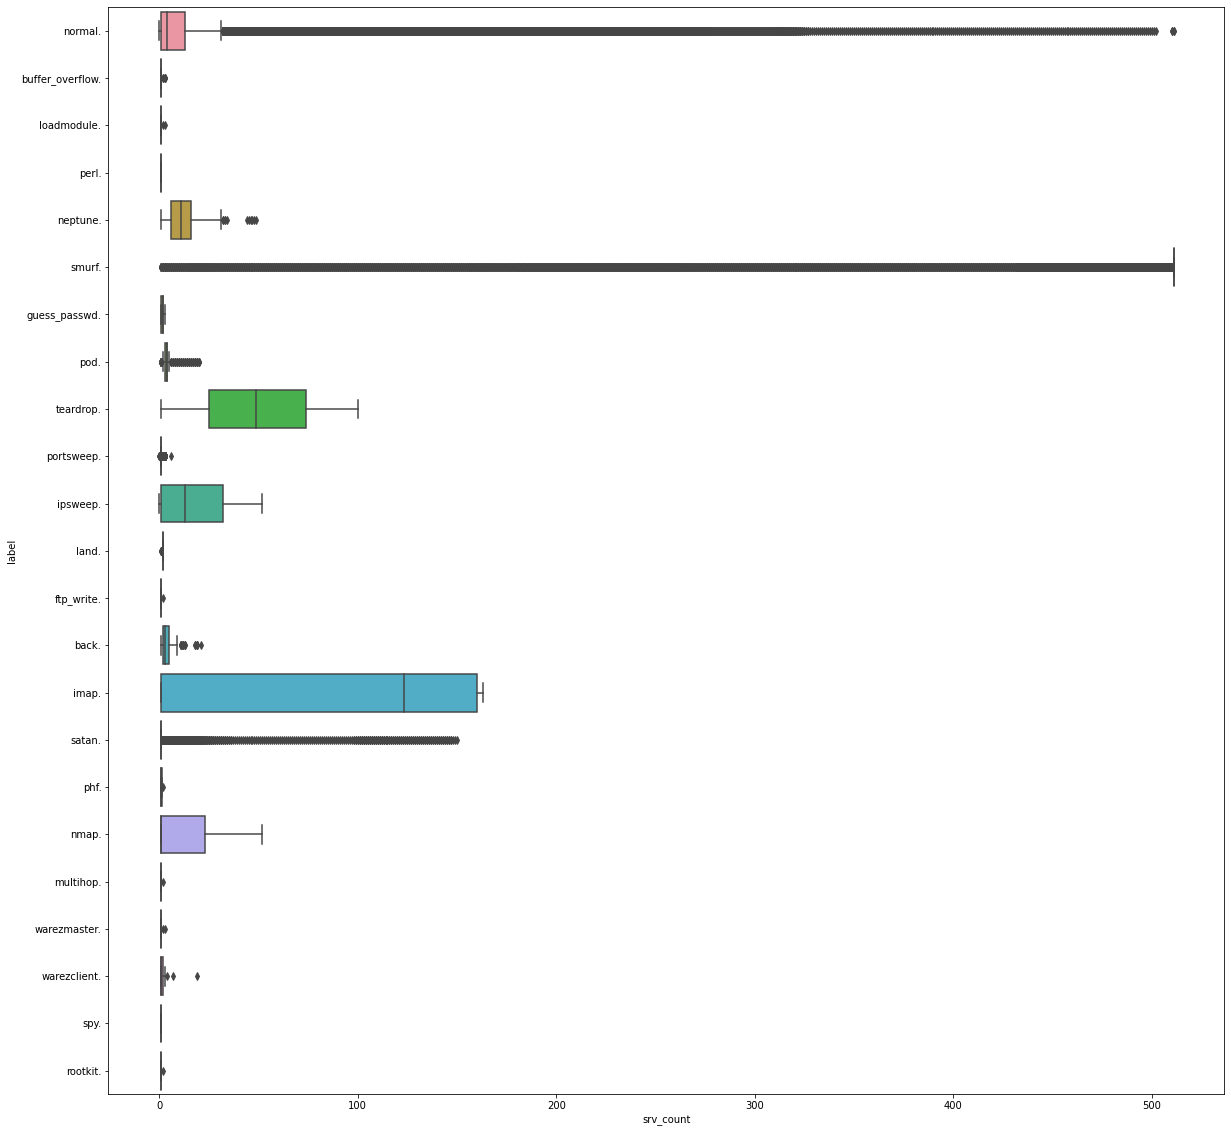

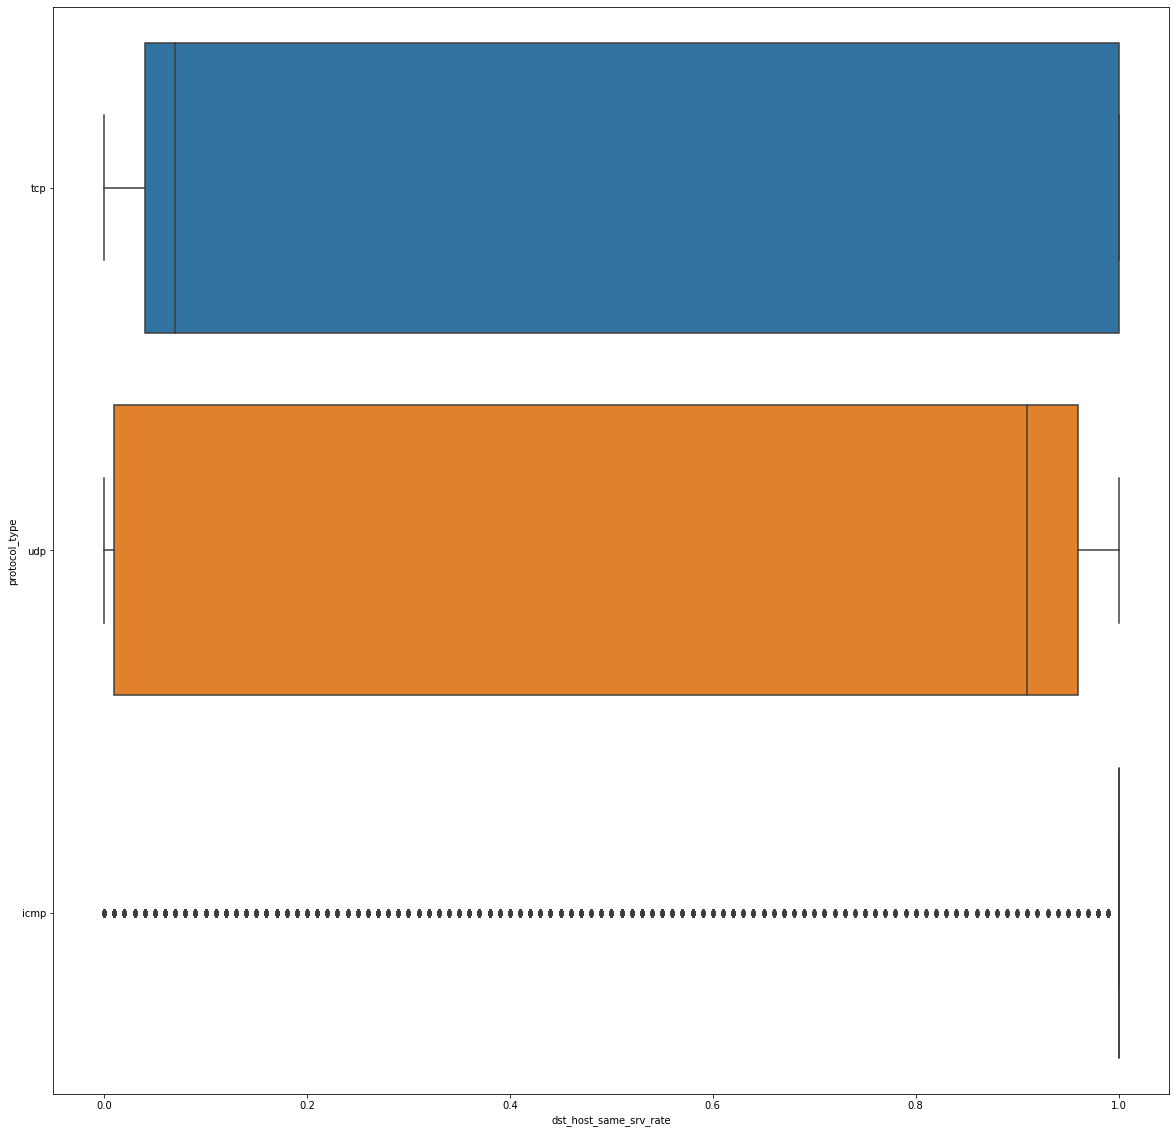

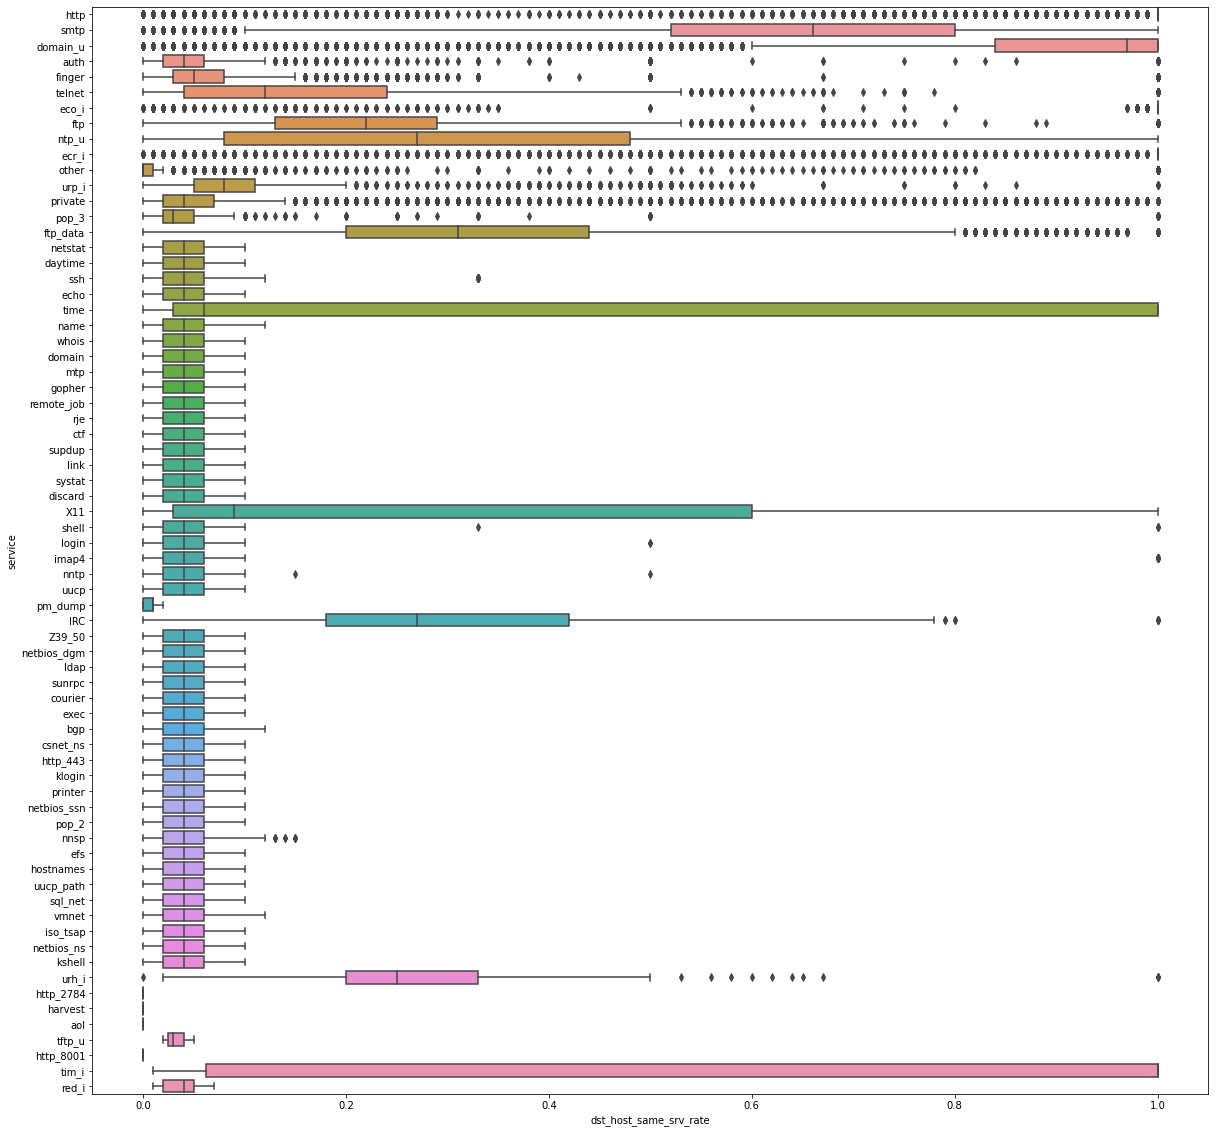

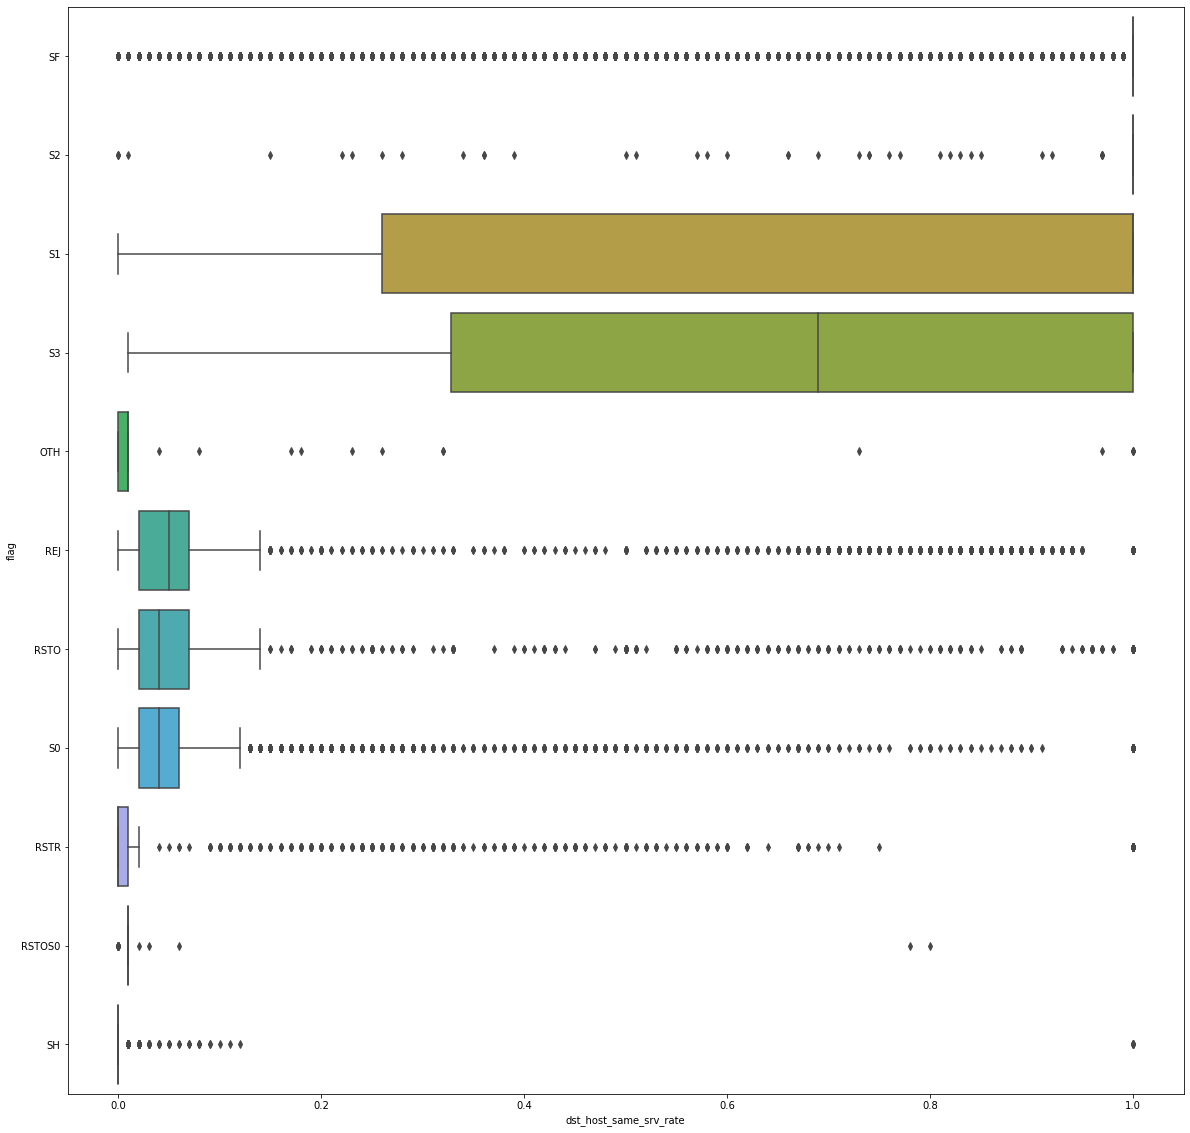

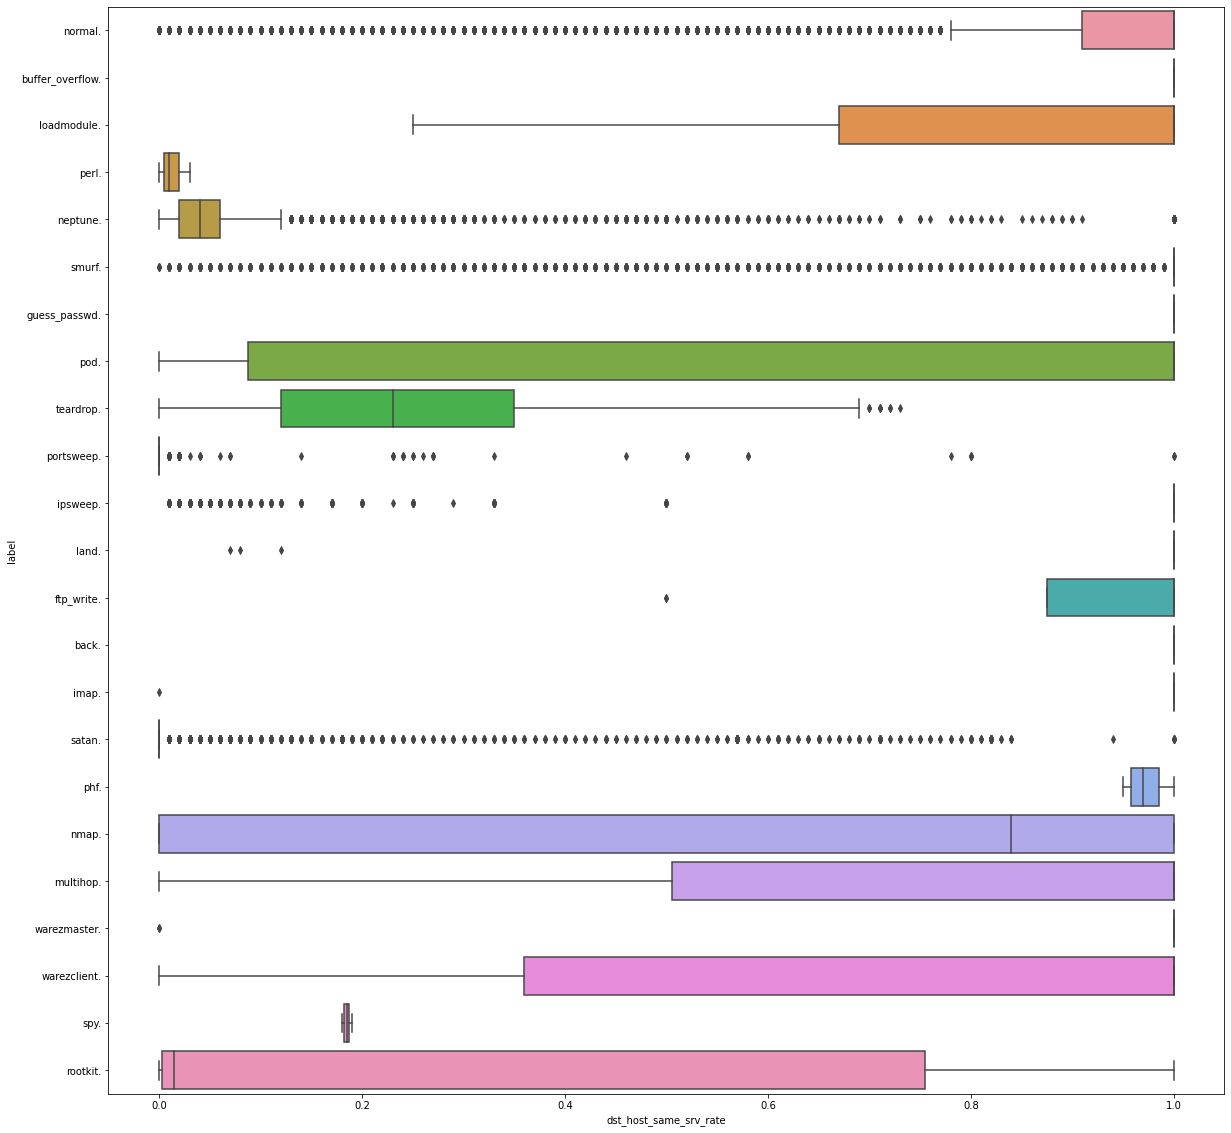

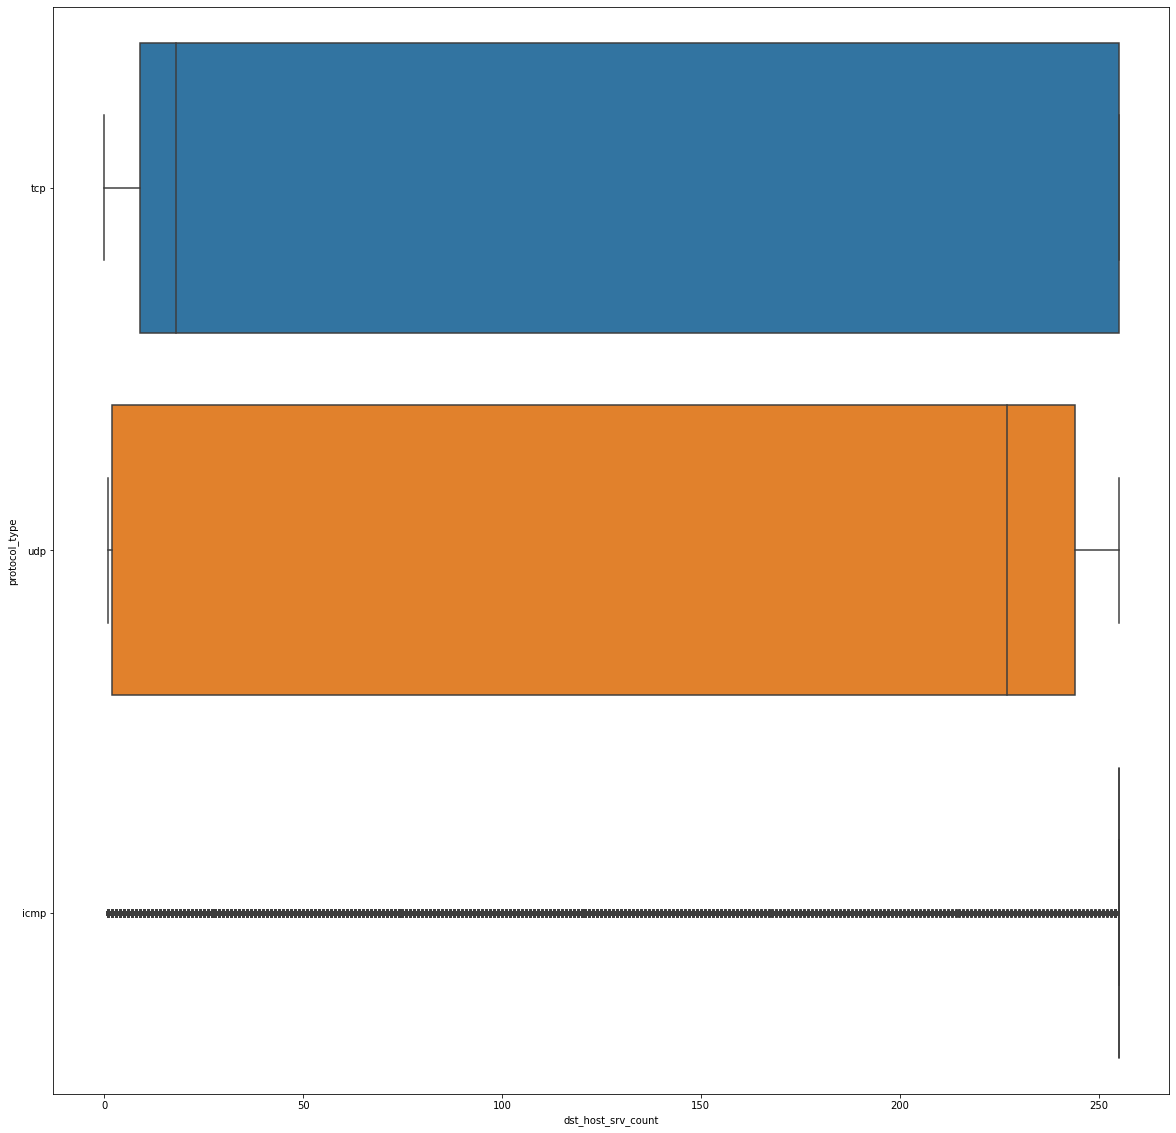

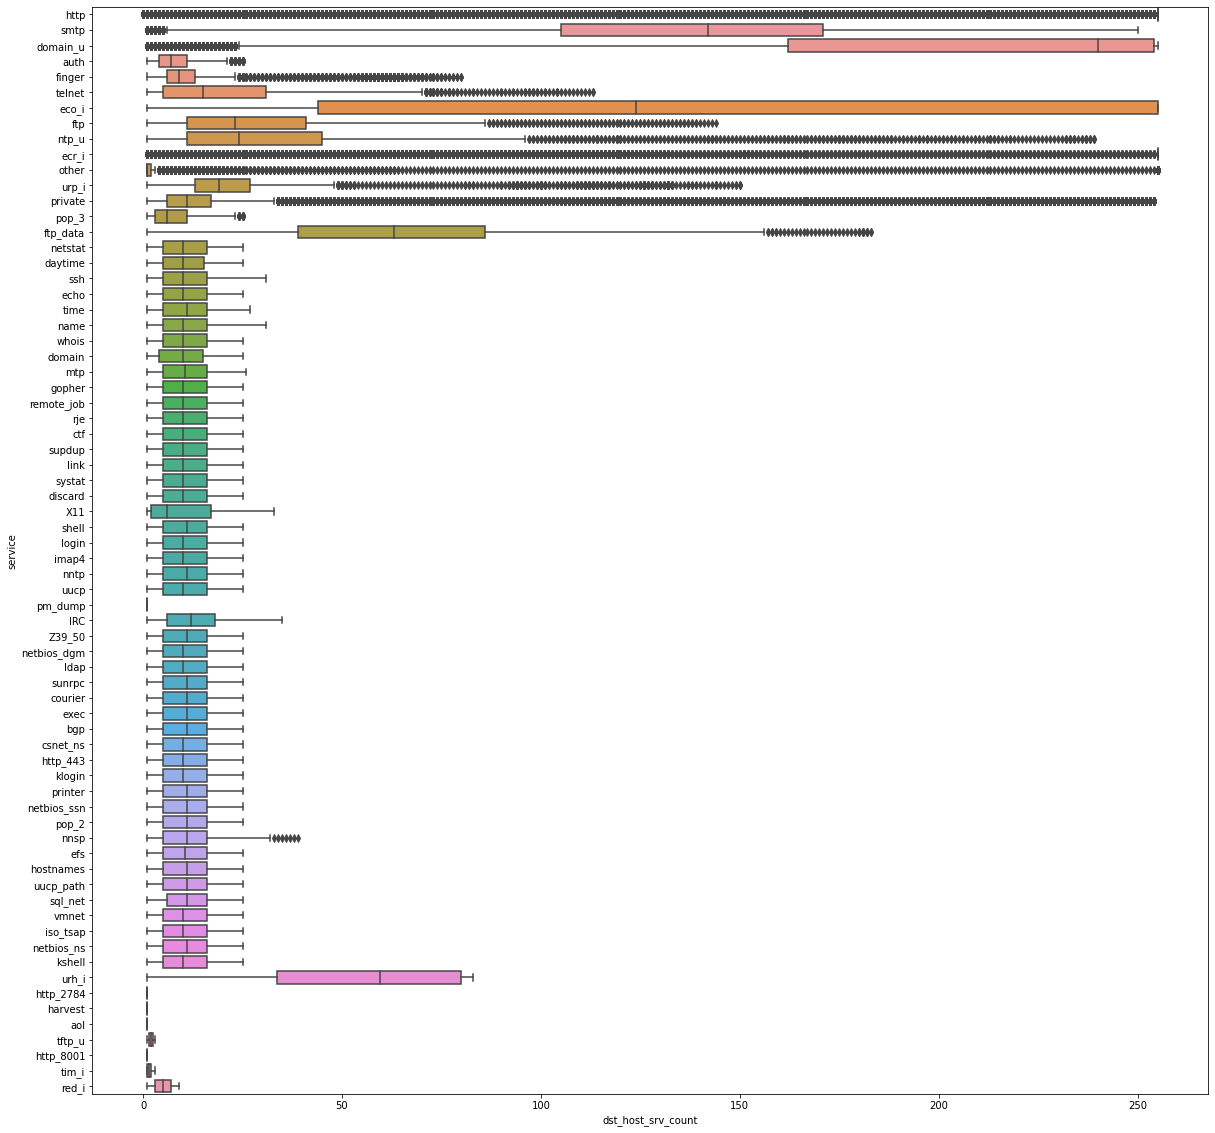

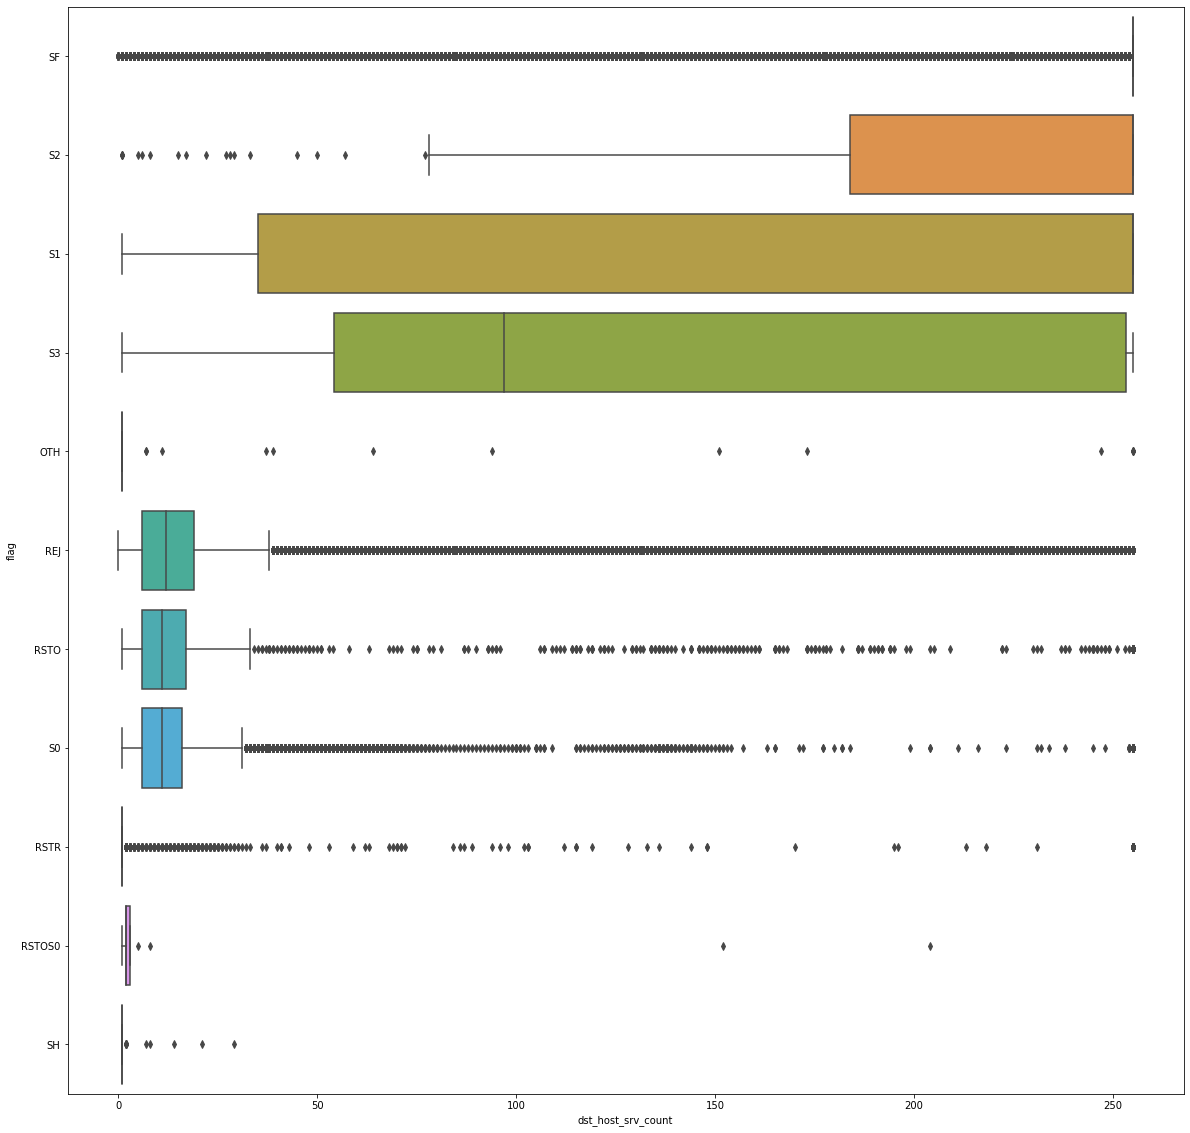

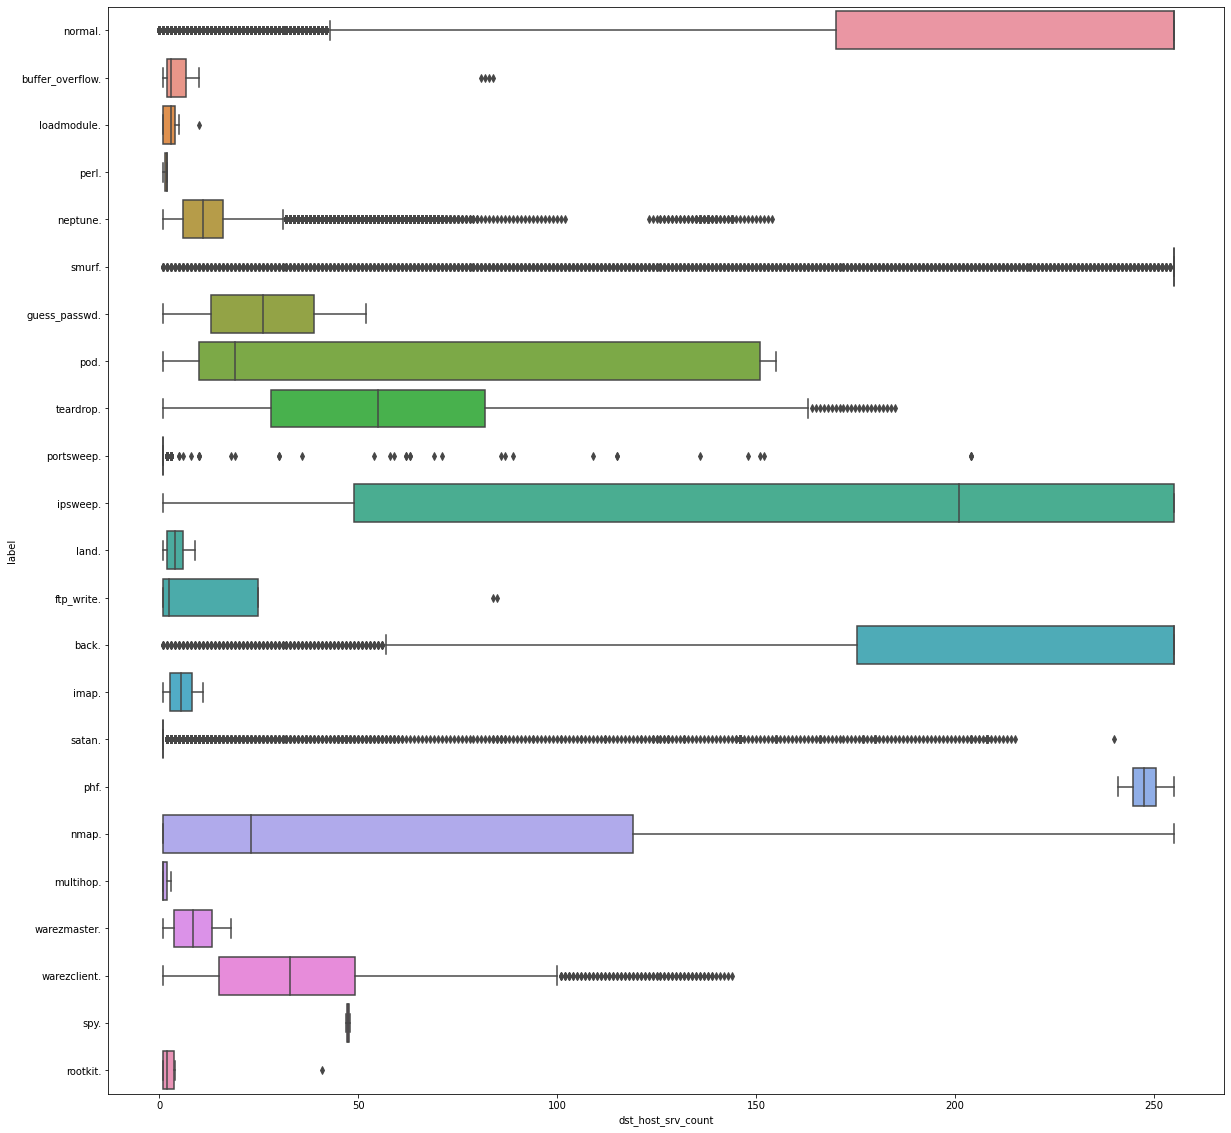

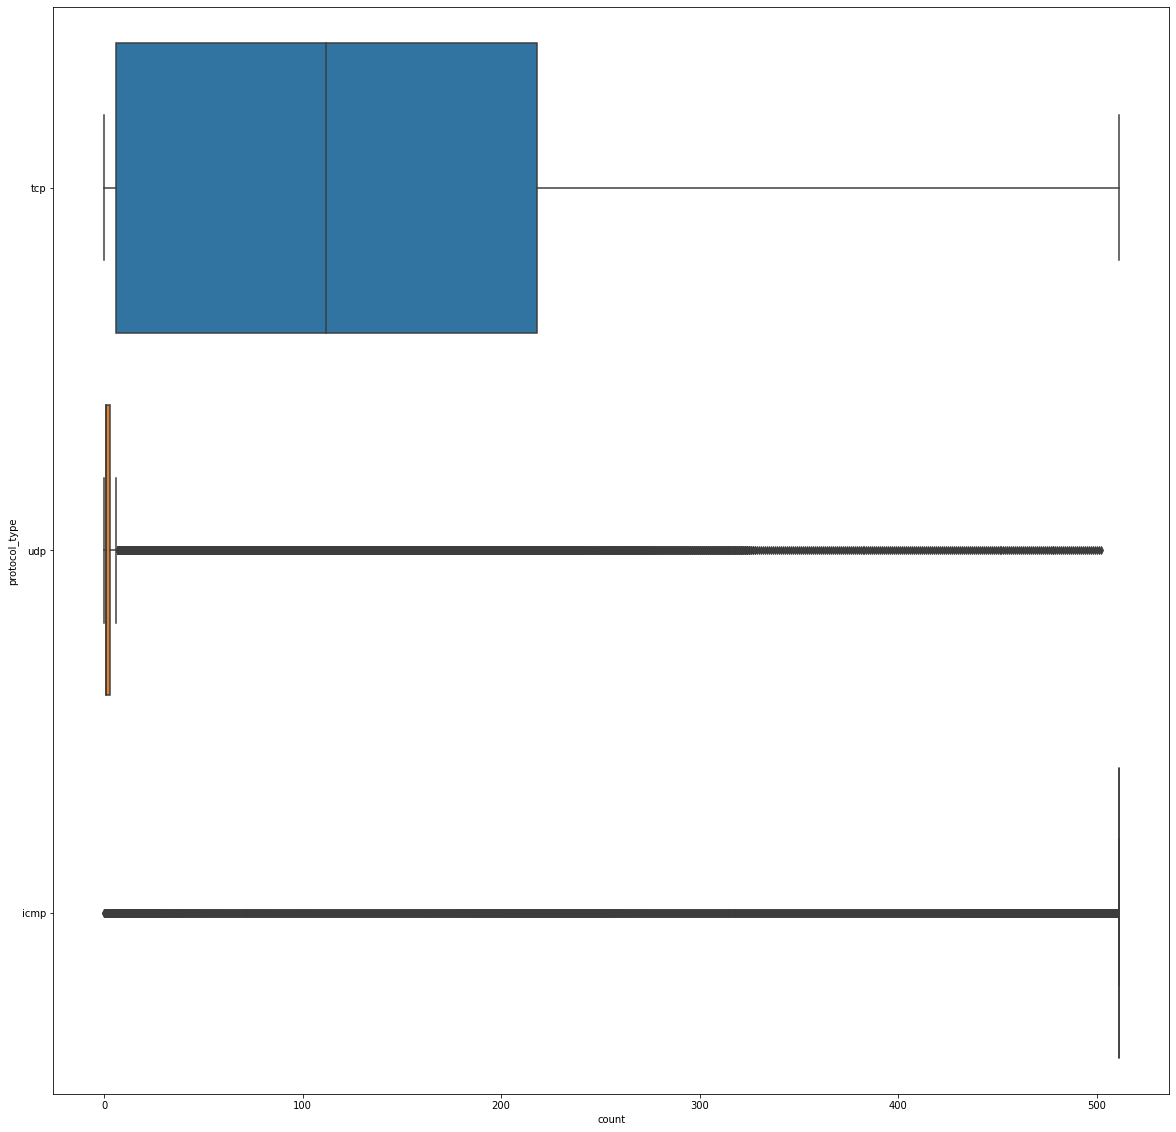

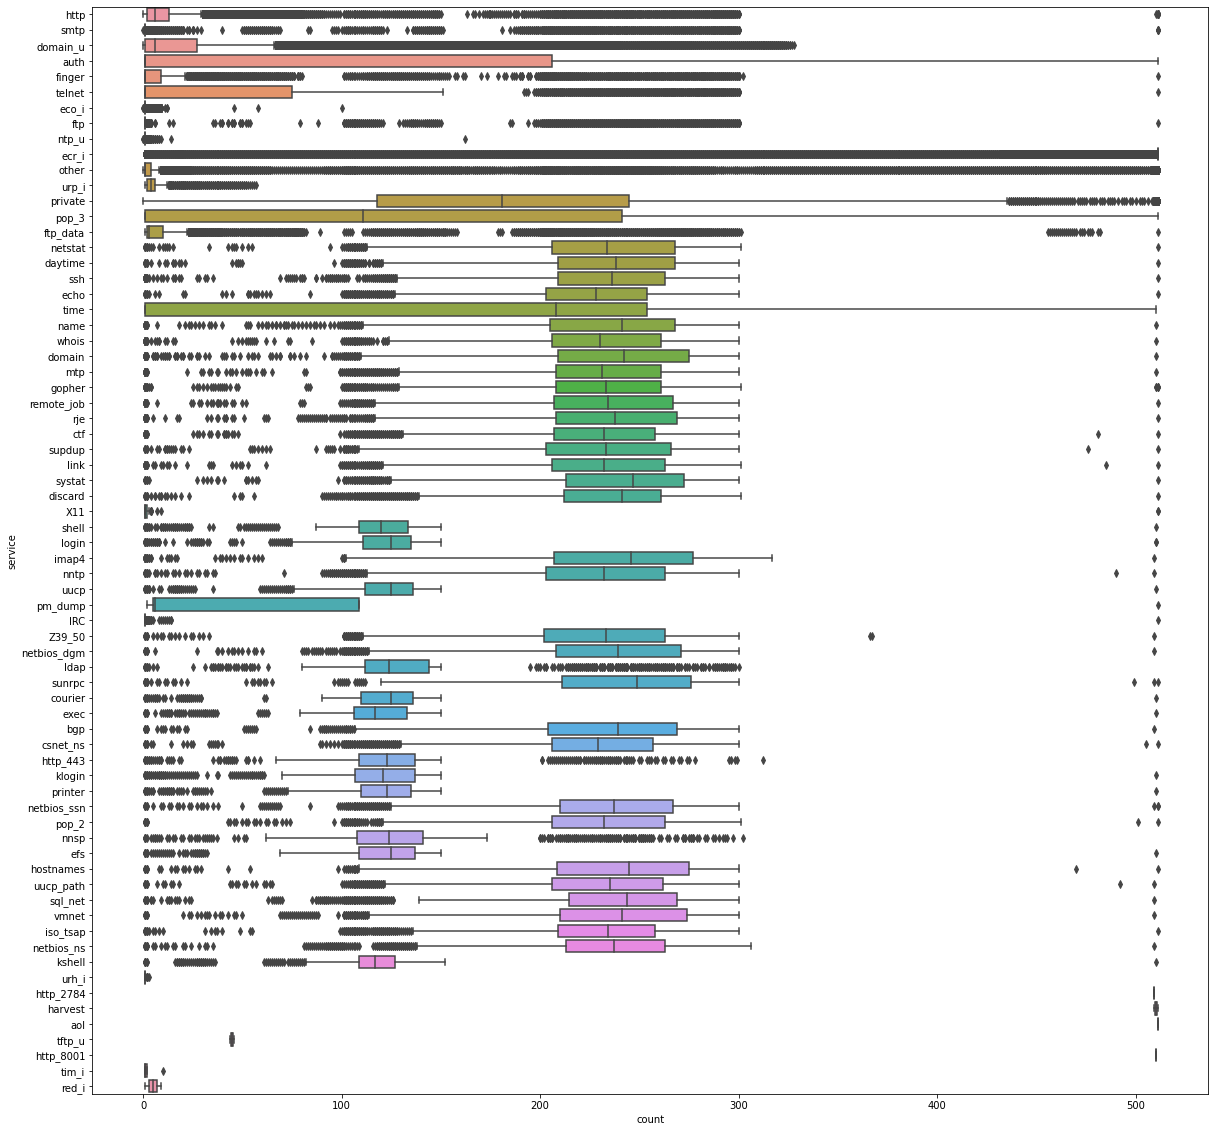

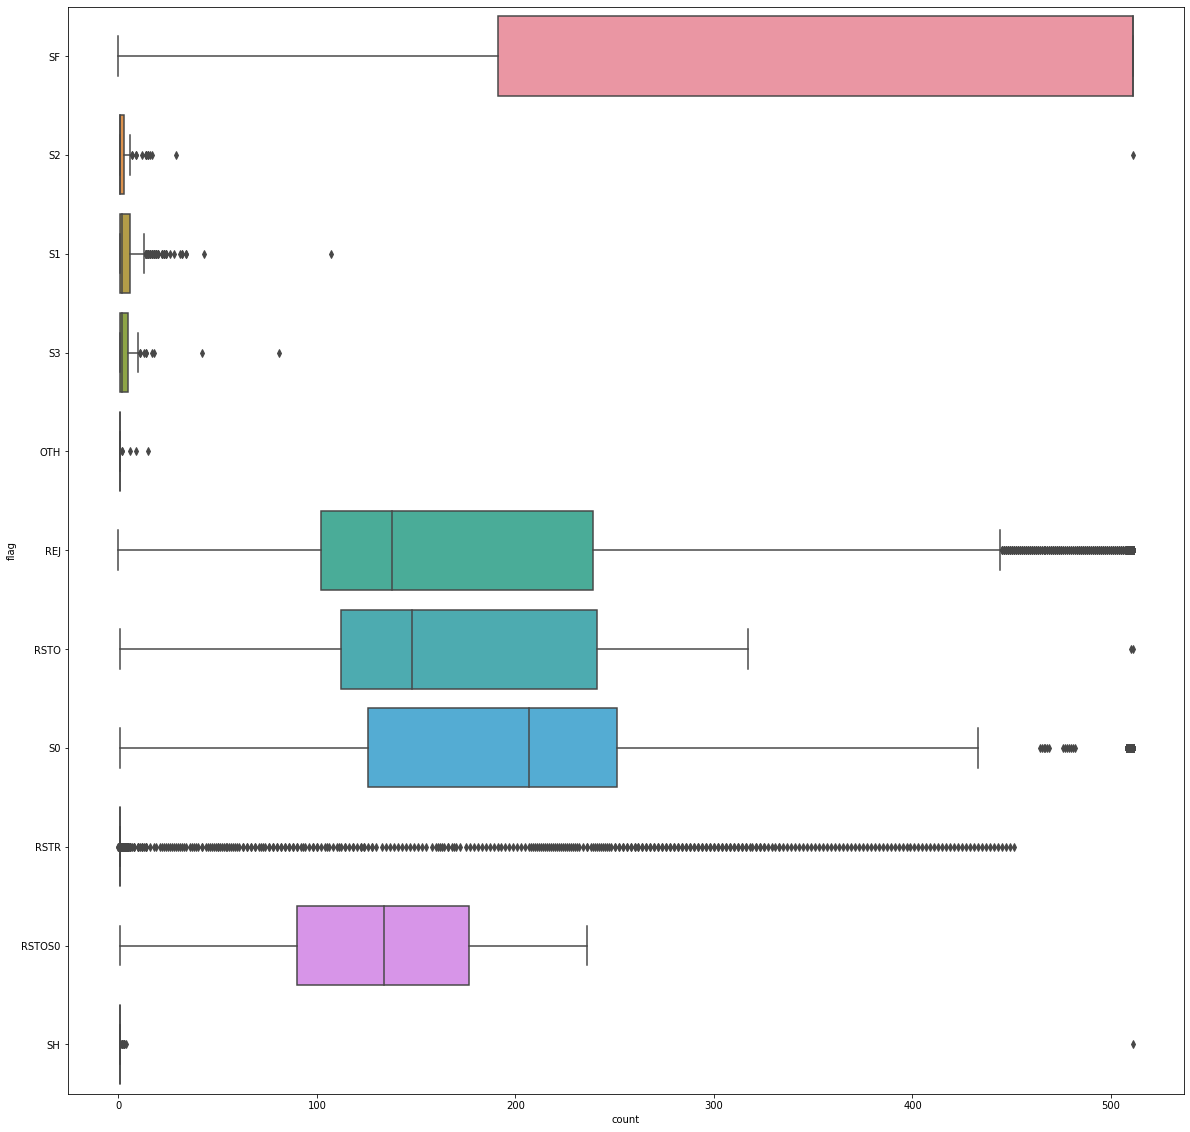

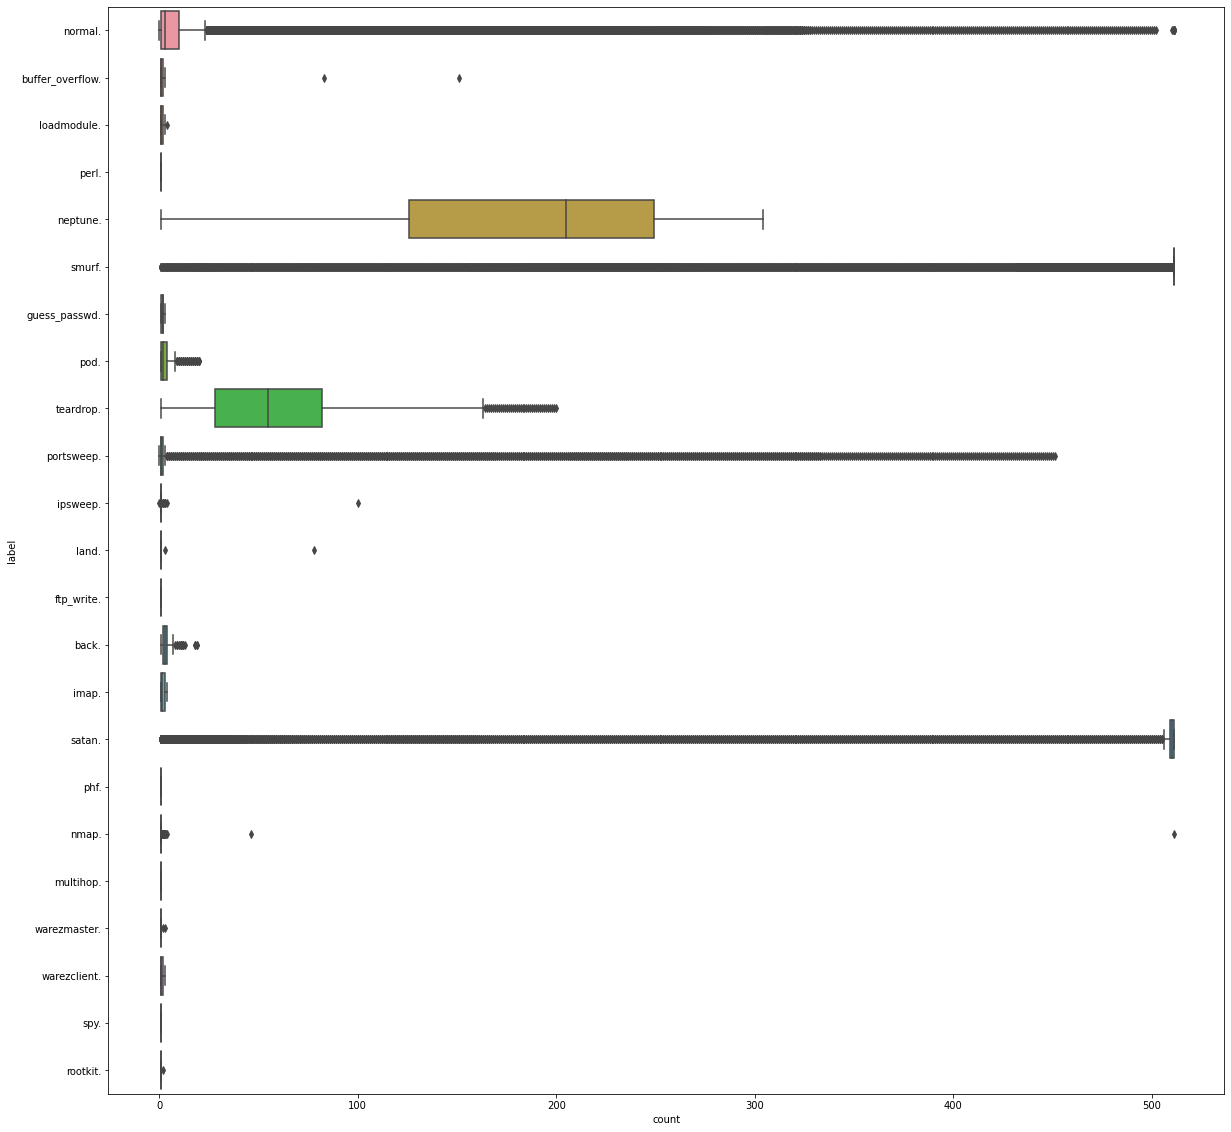

In [30]:
cnt=0
for i,y in enumerate(dst):
  for j,x in enumerate(cat_col):
      plt.figure(cnt+1)
      plt.figure(figsize = (20,20))
      sns.boxplot(data=df, x=y, y=x)
      # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
      cnt+=1


<Figure size 432x288 with 0 Axes>

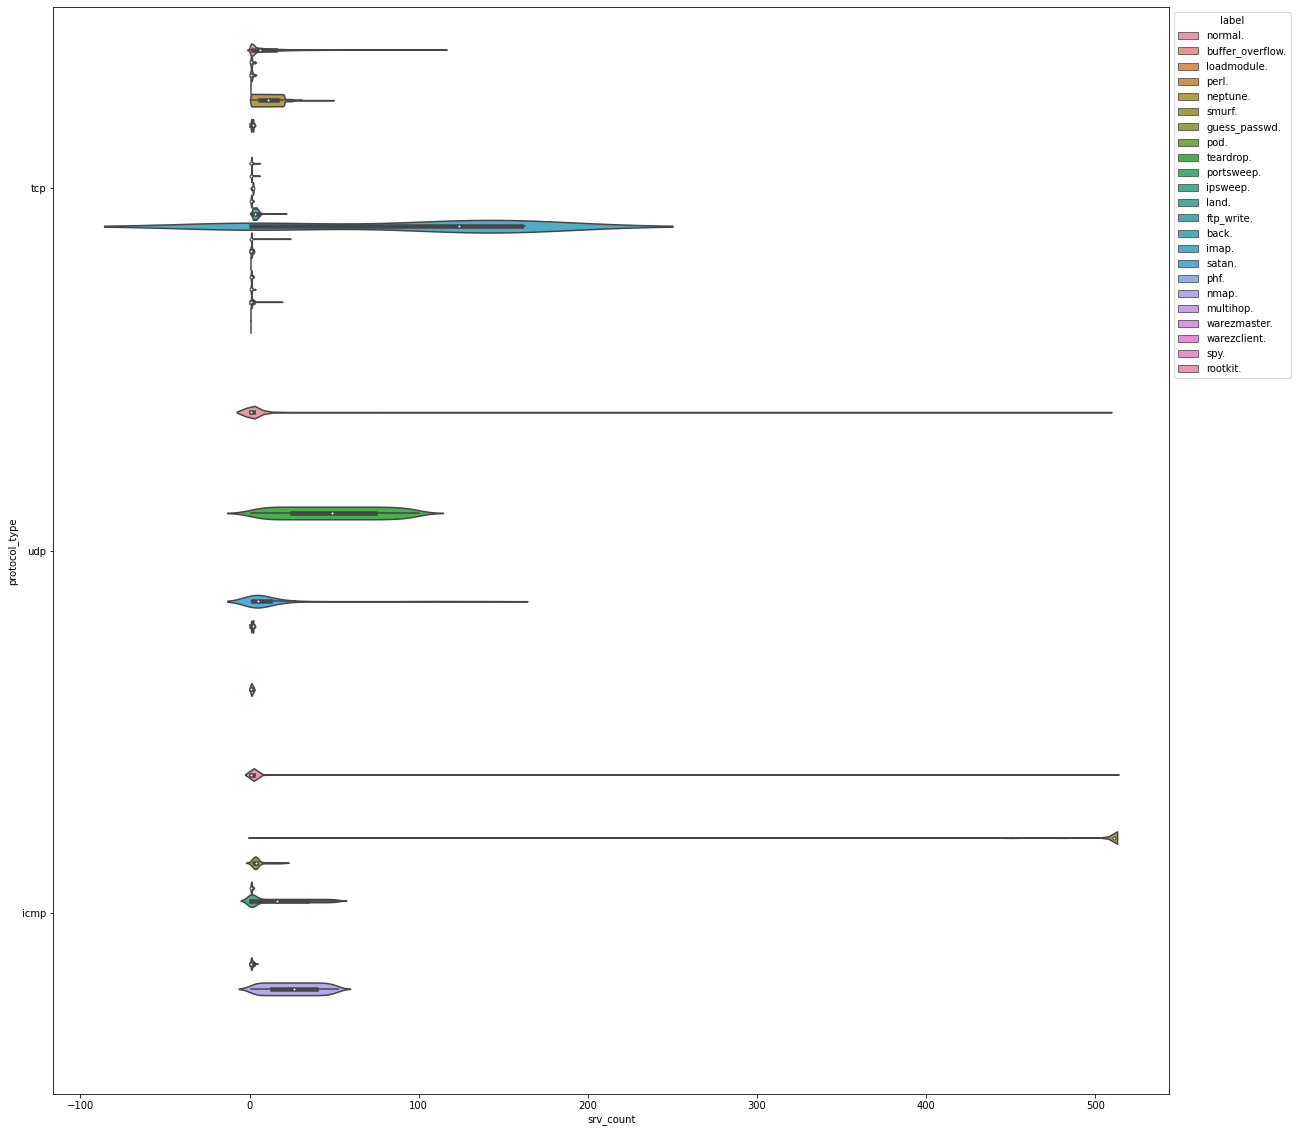

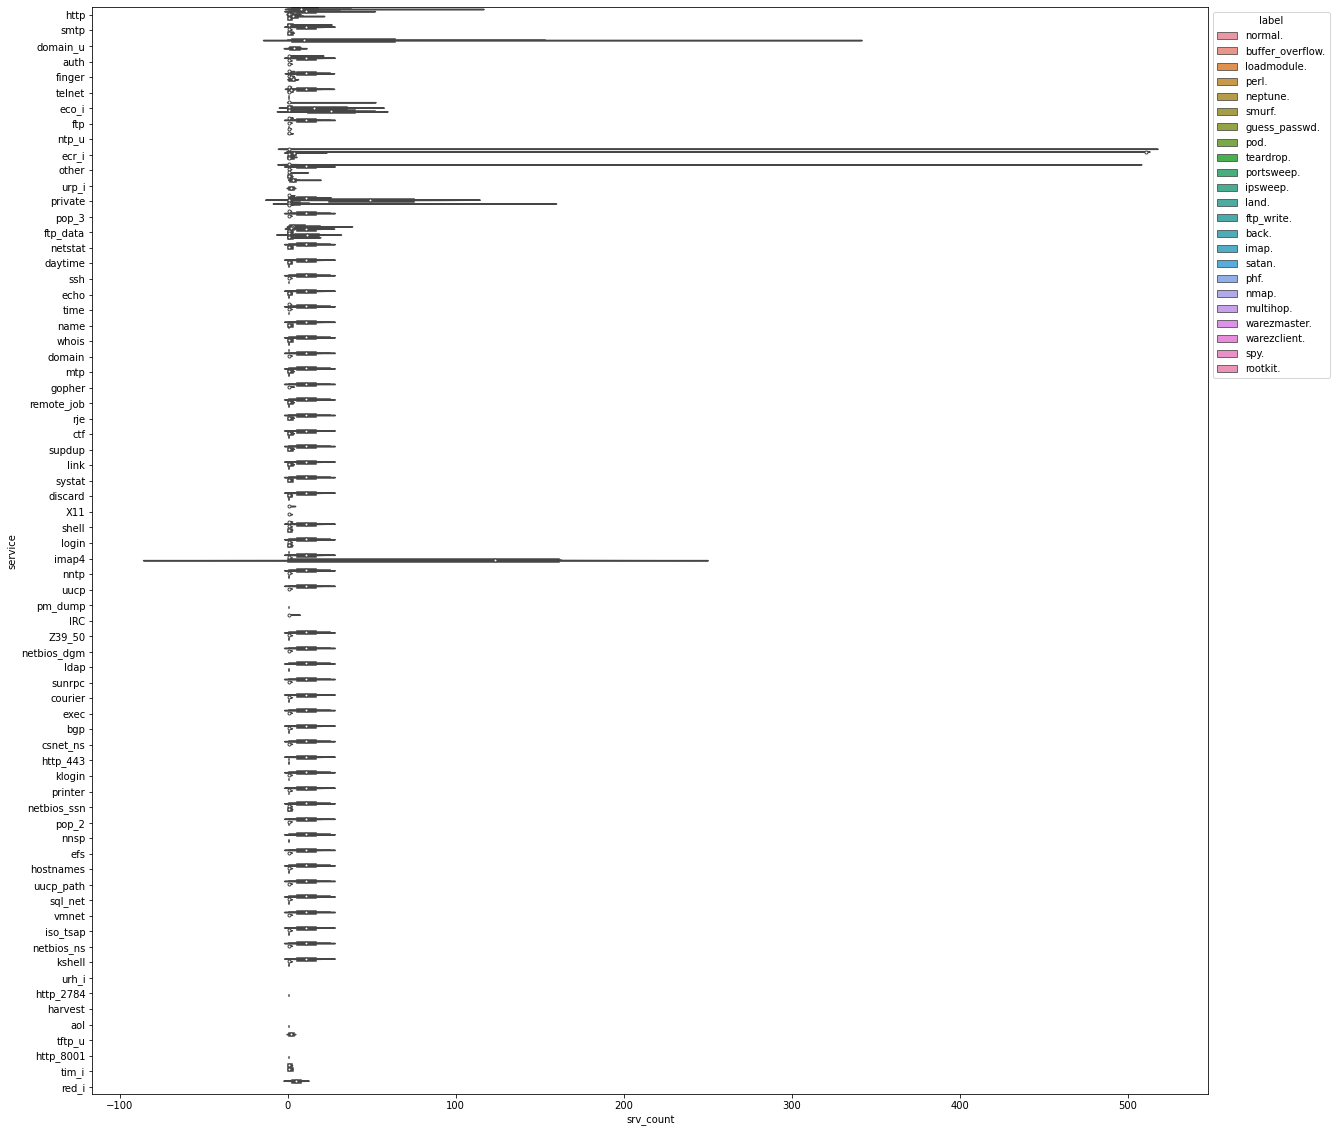

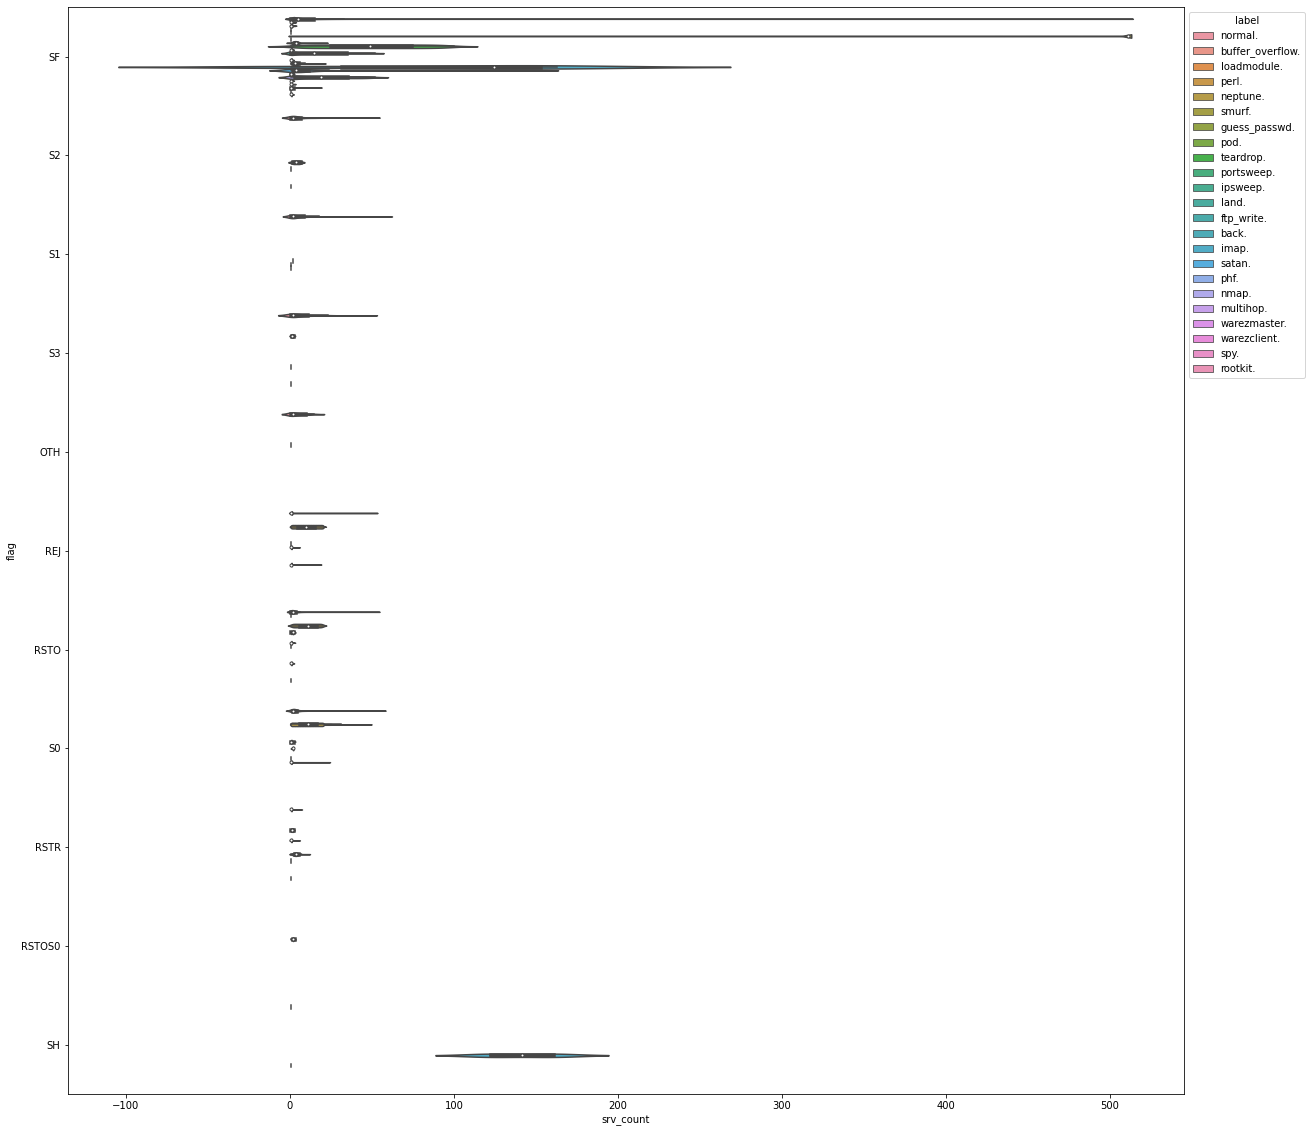

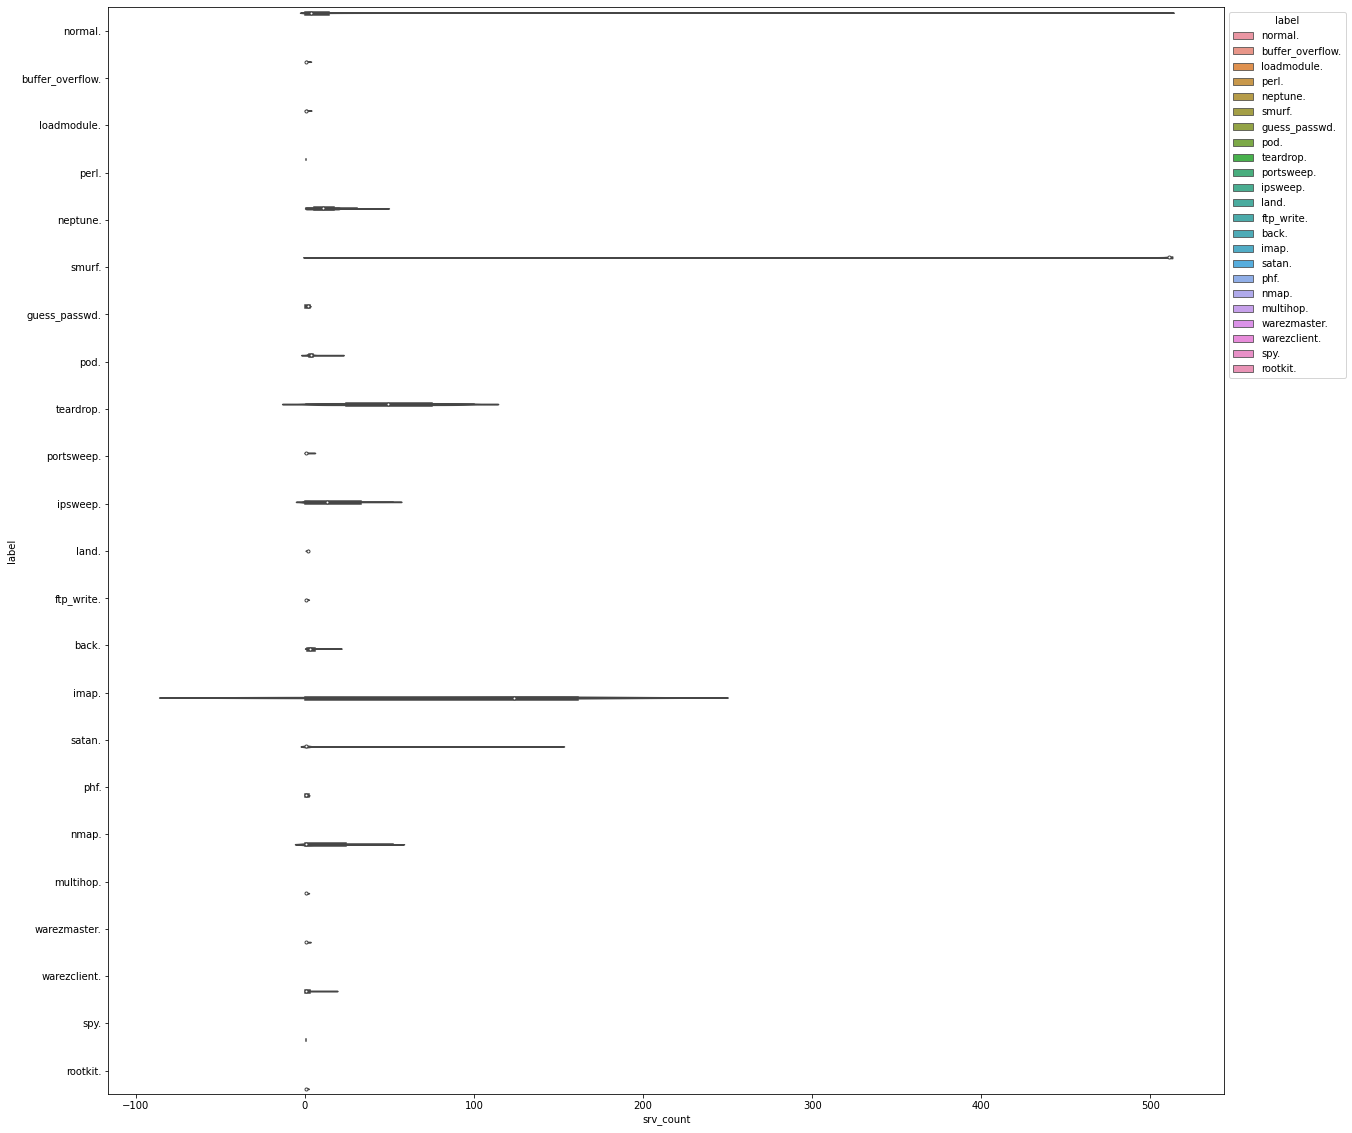

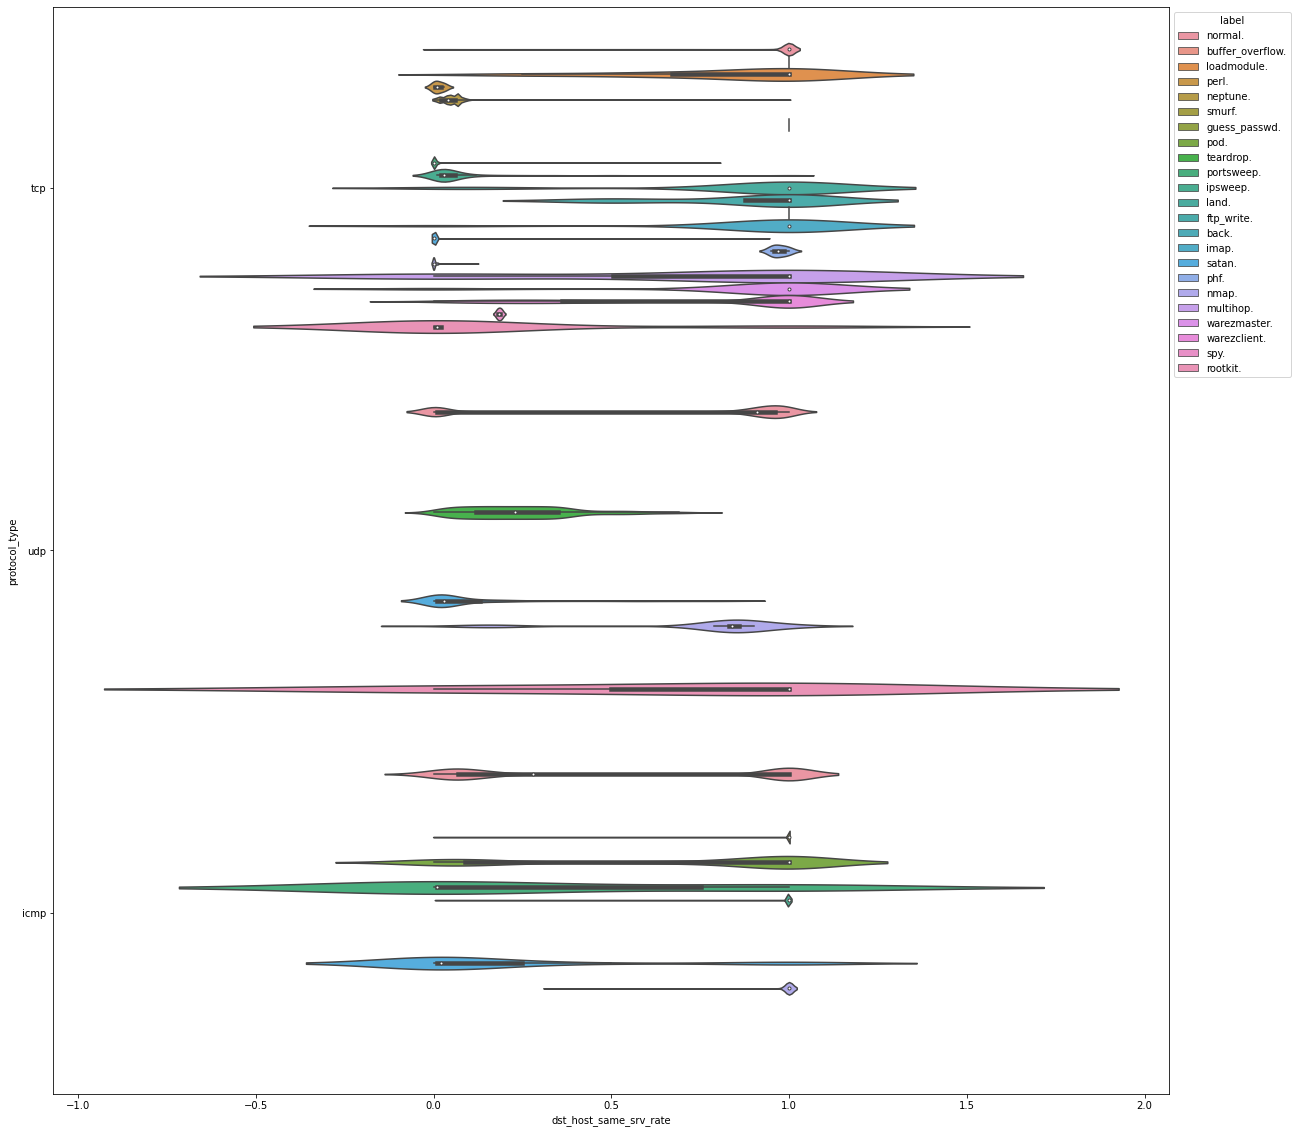

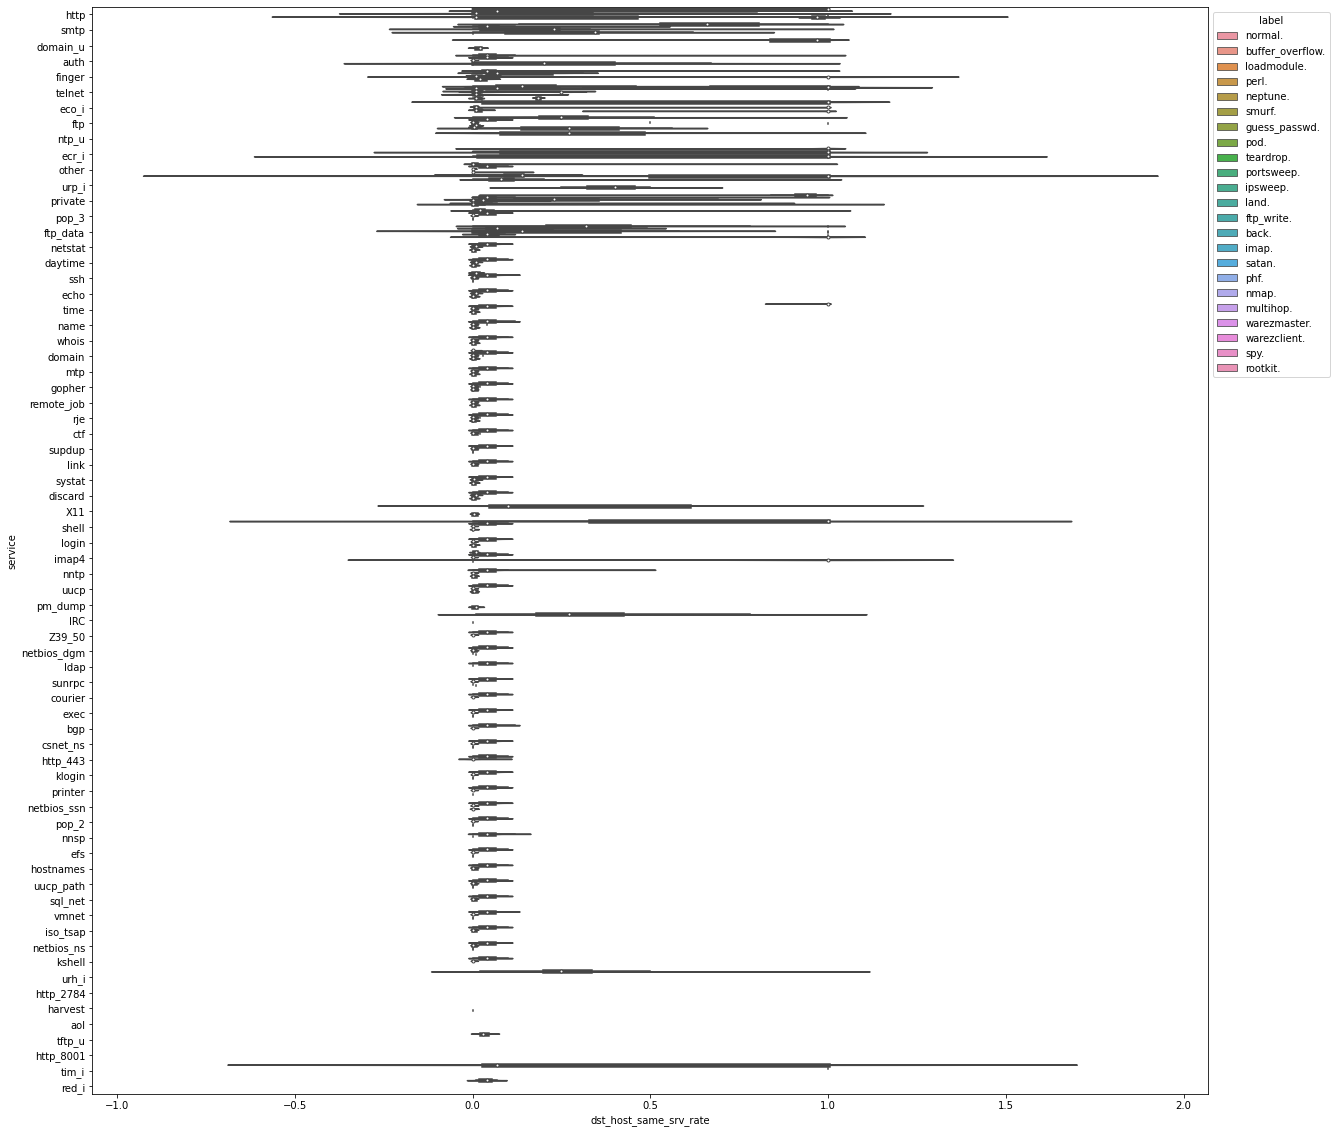

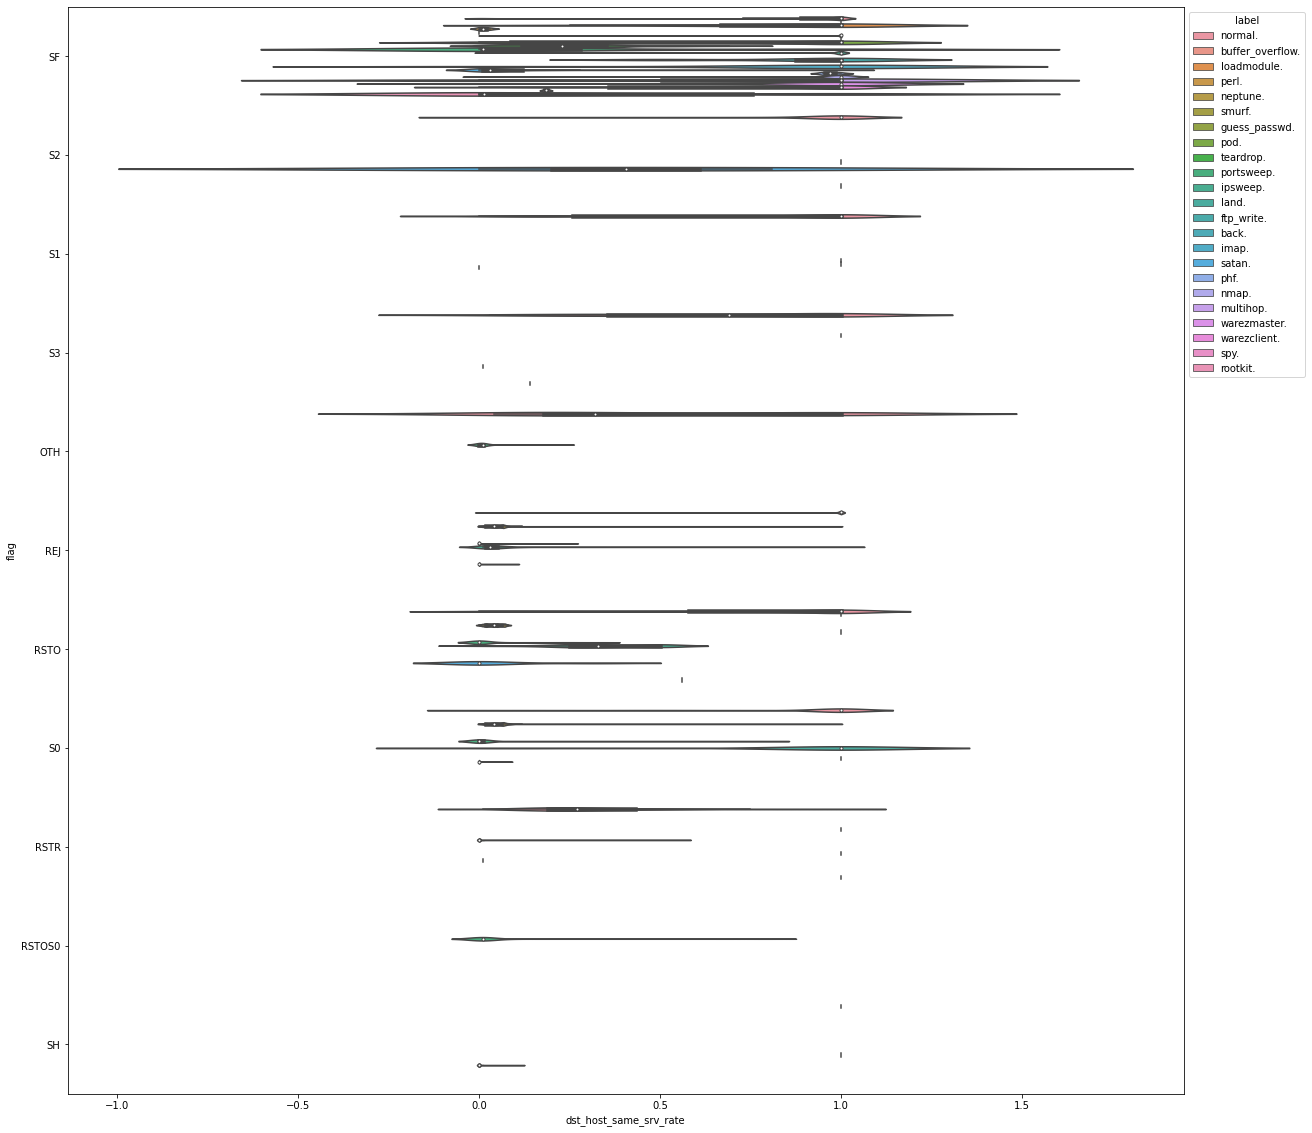

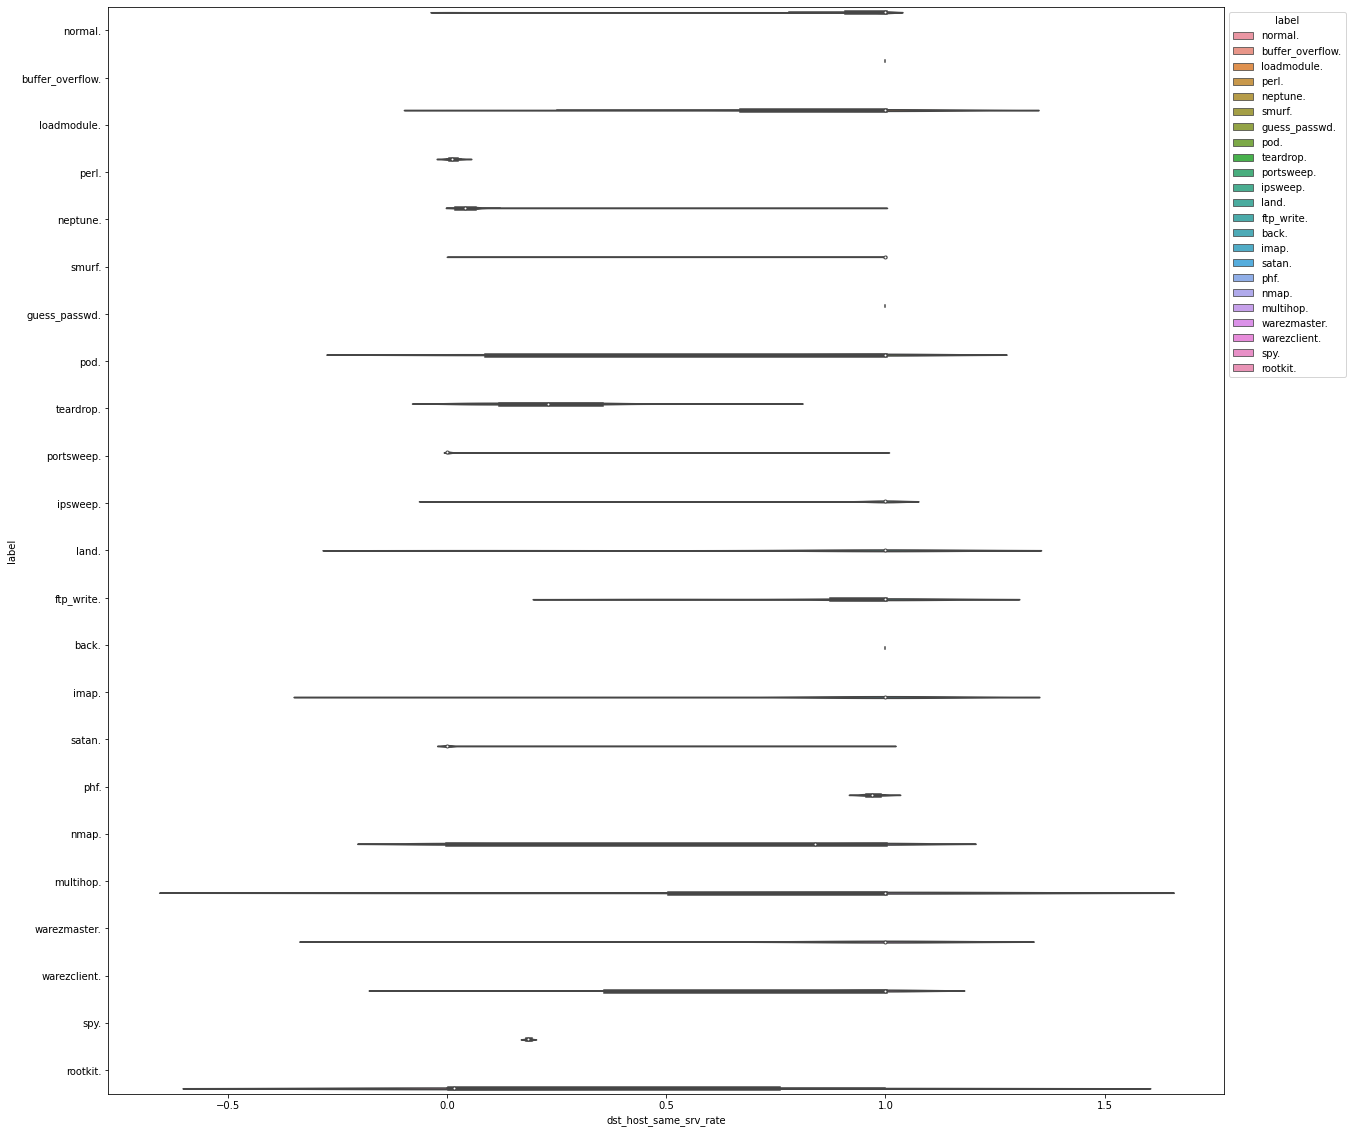

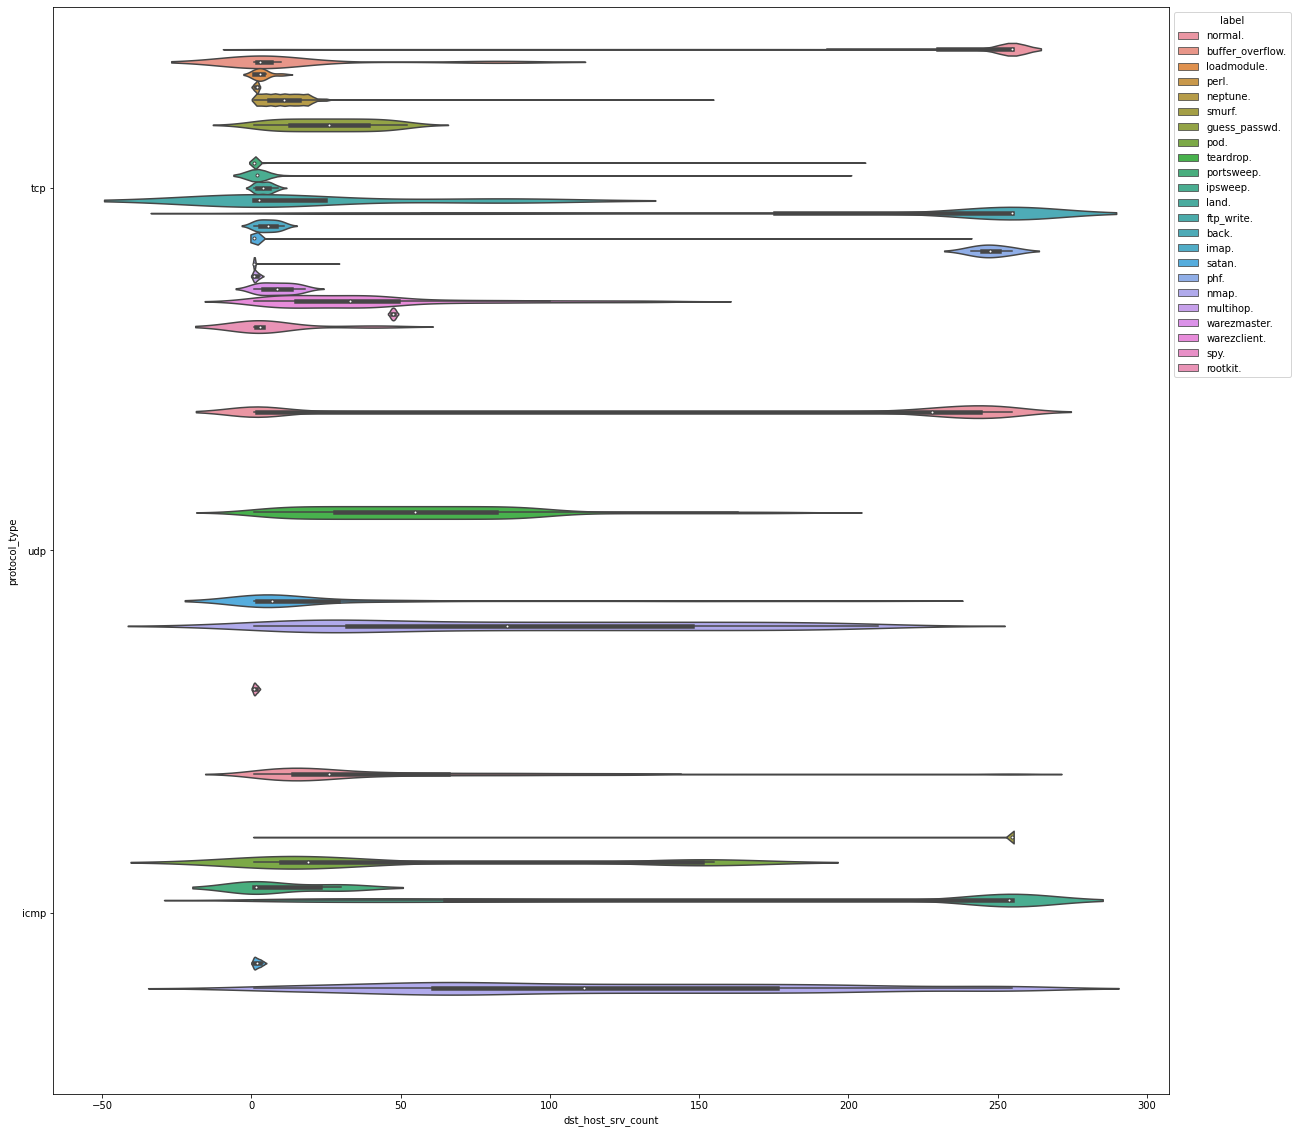

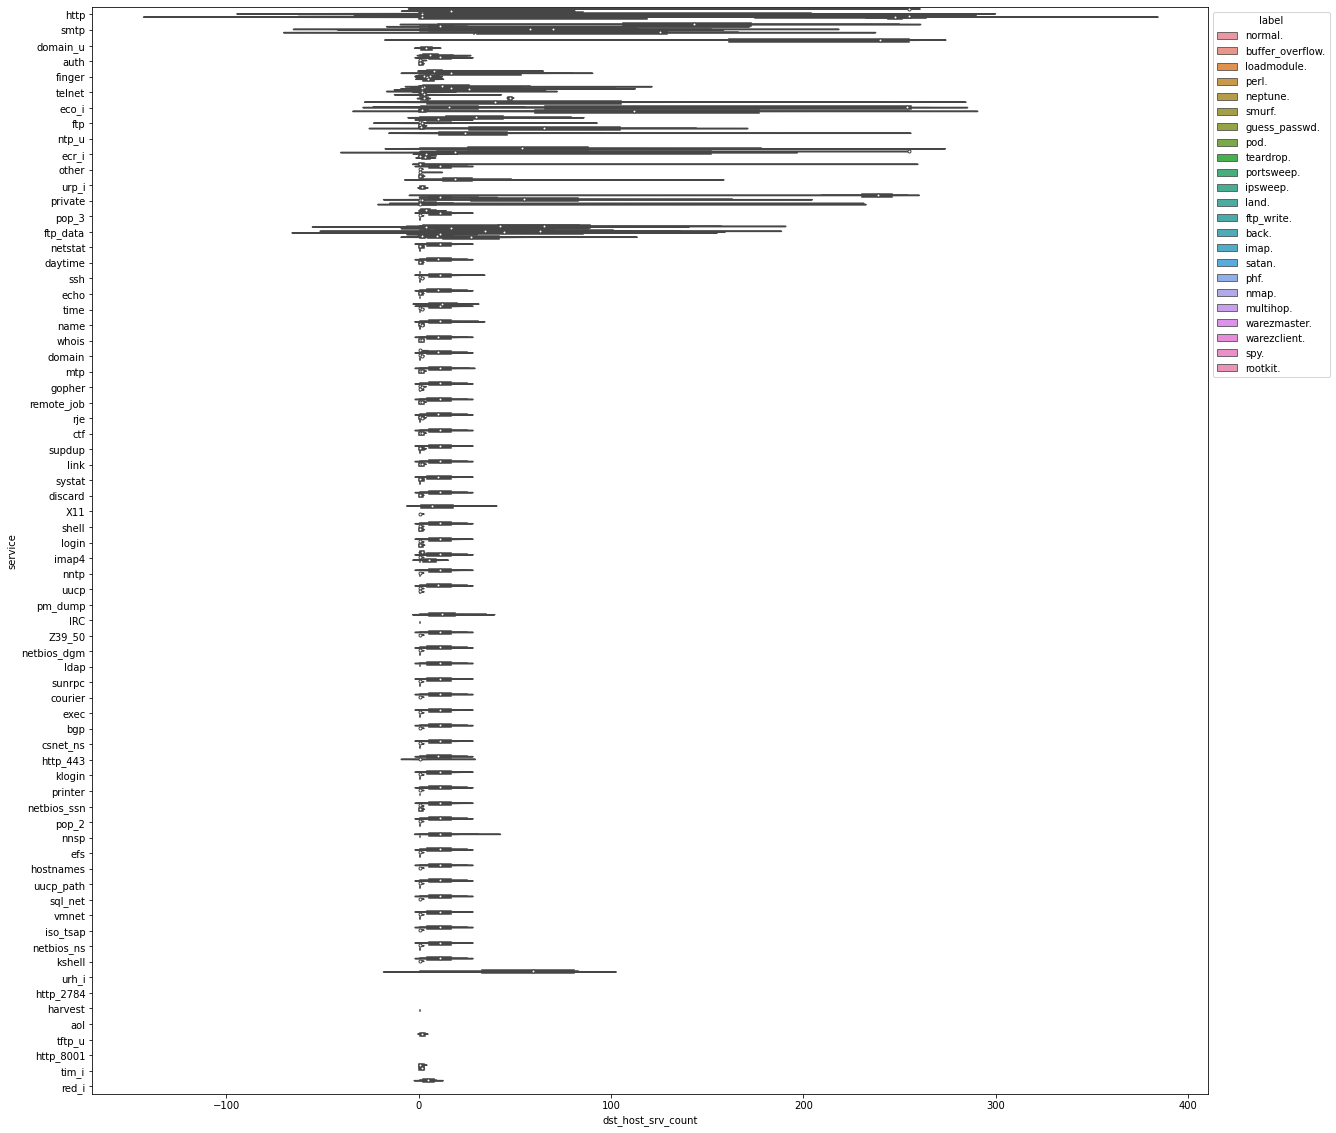

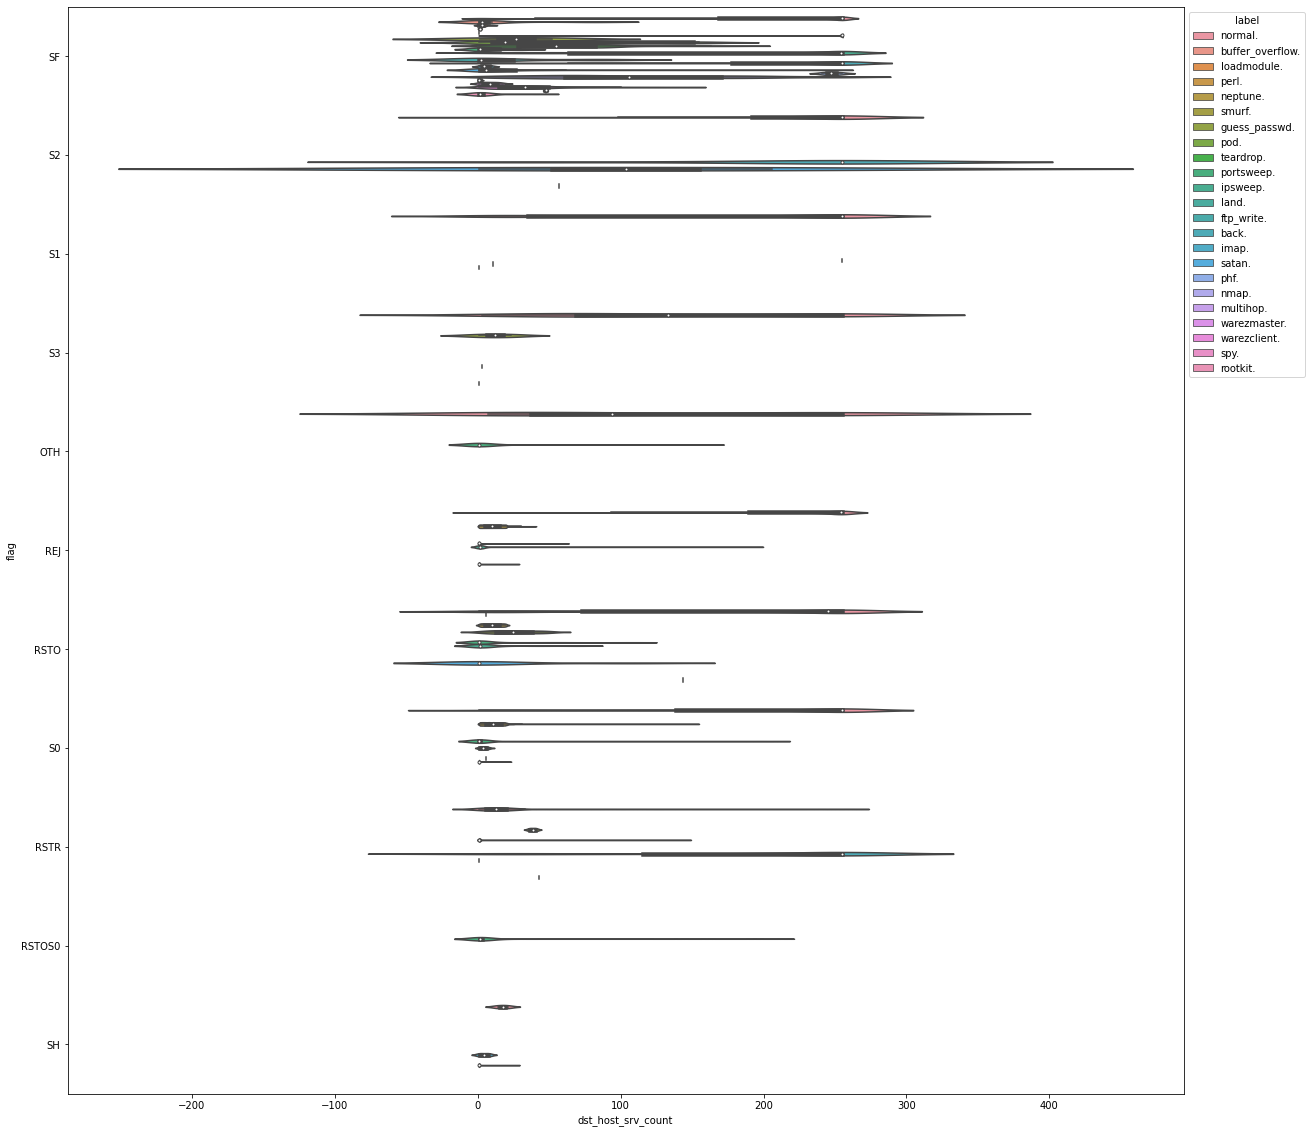

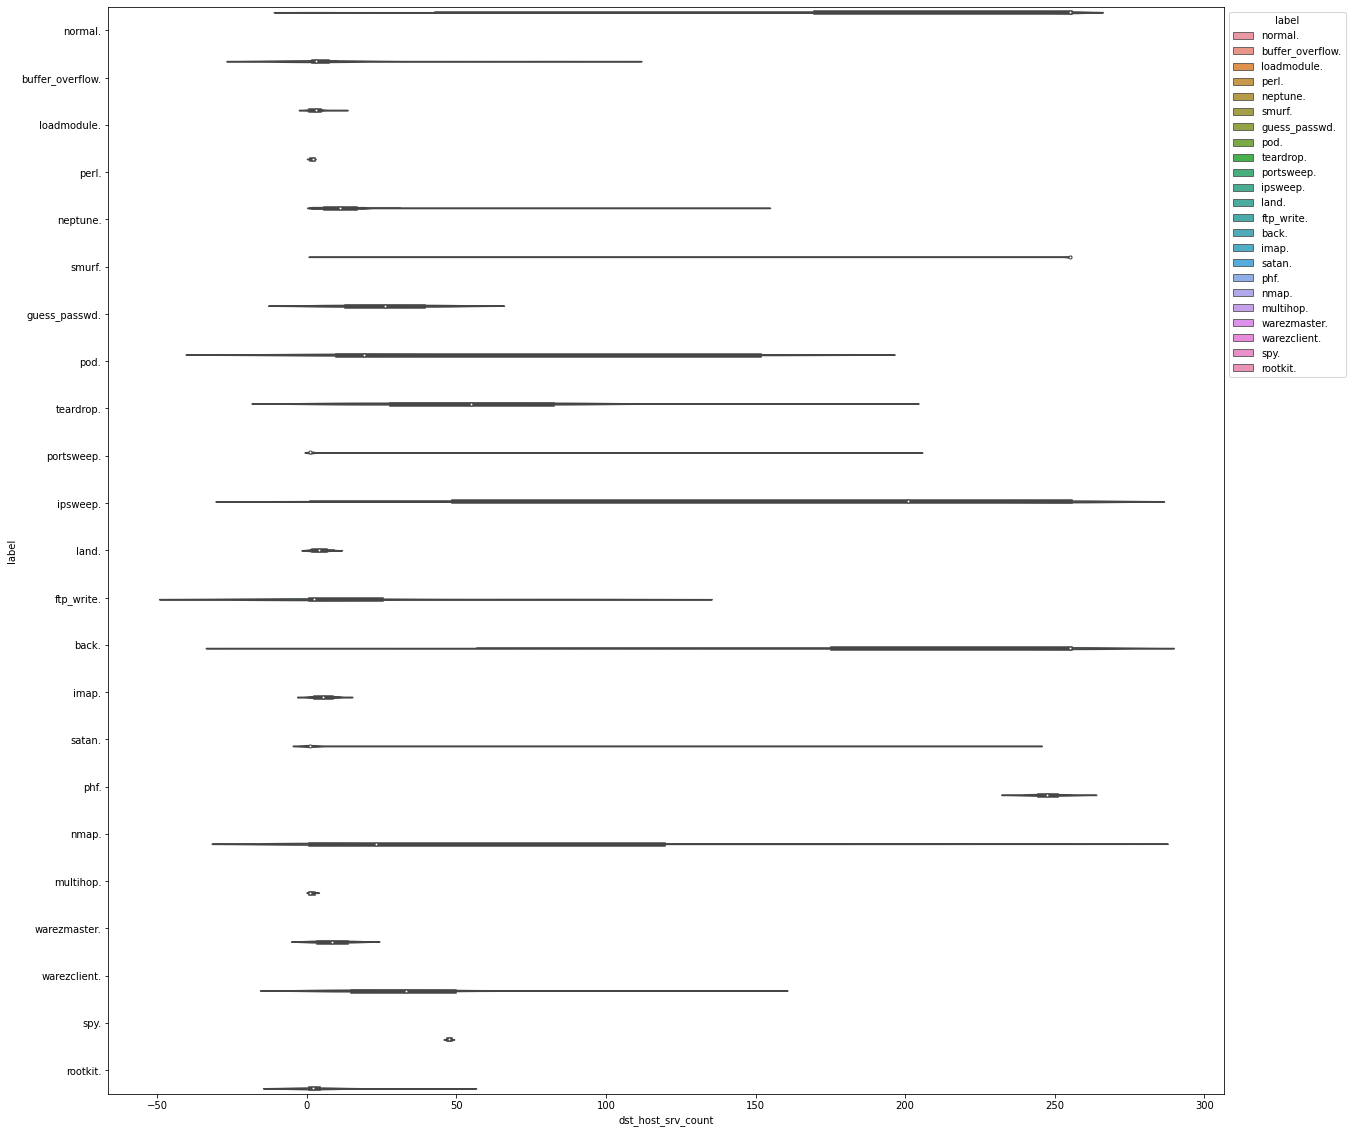

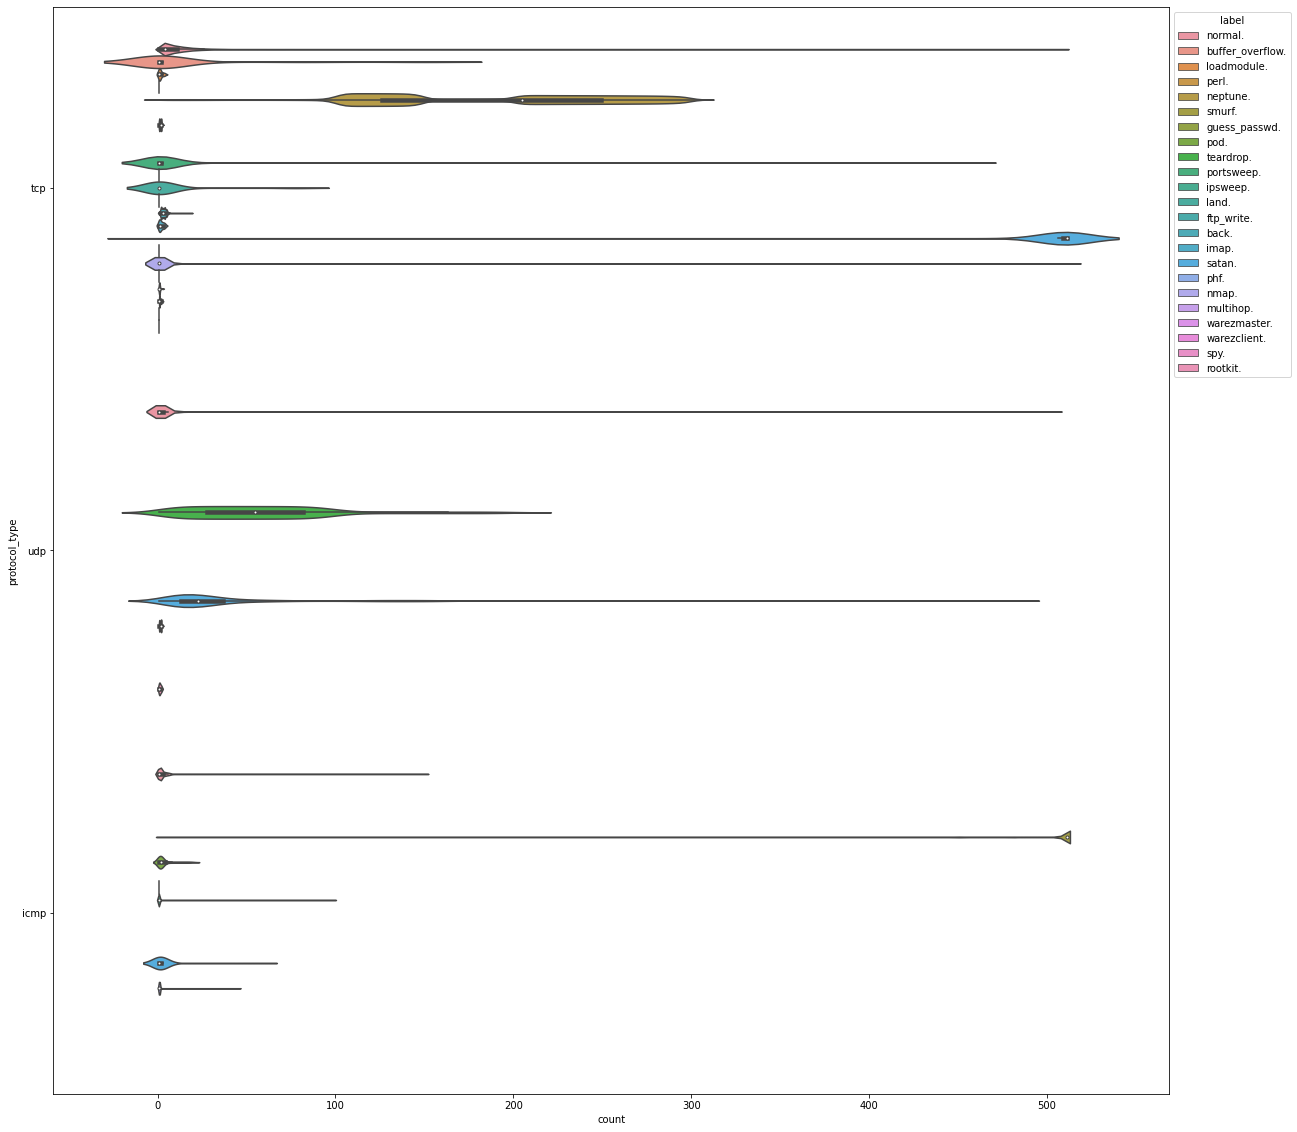

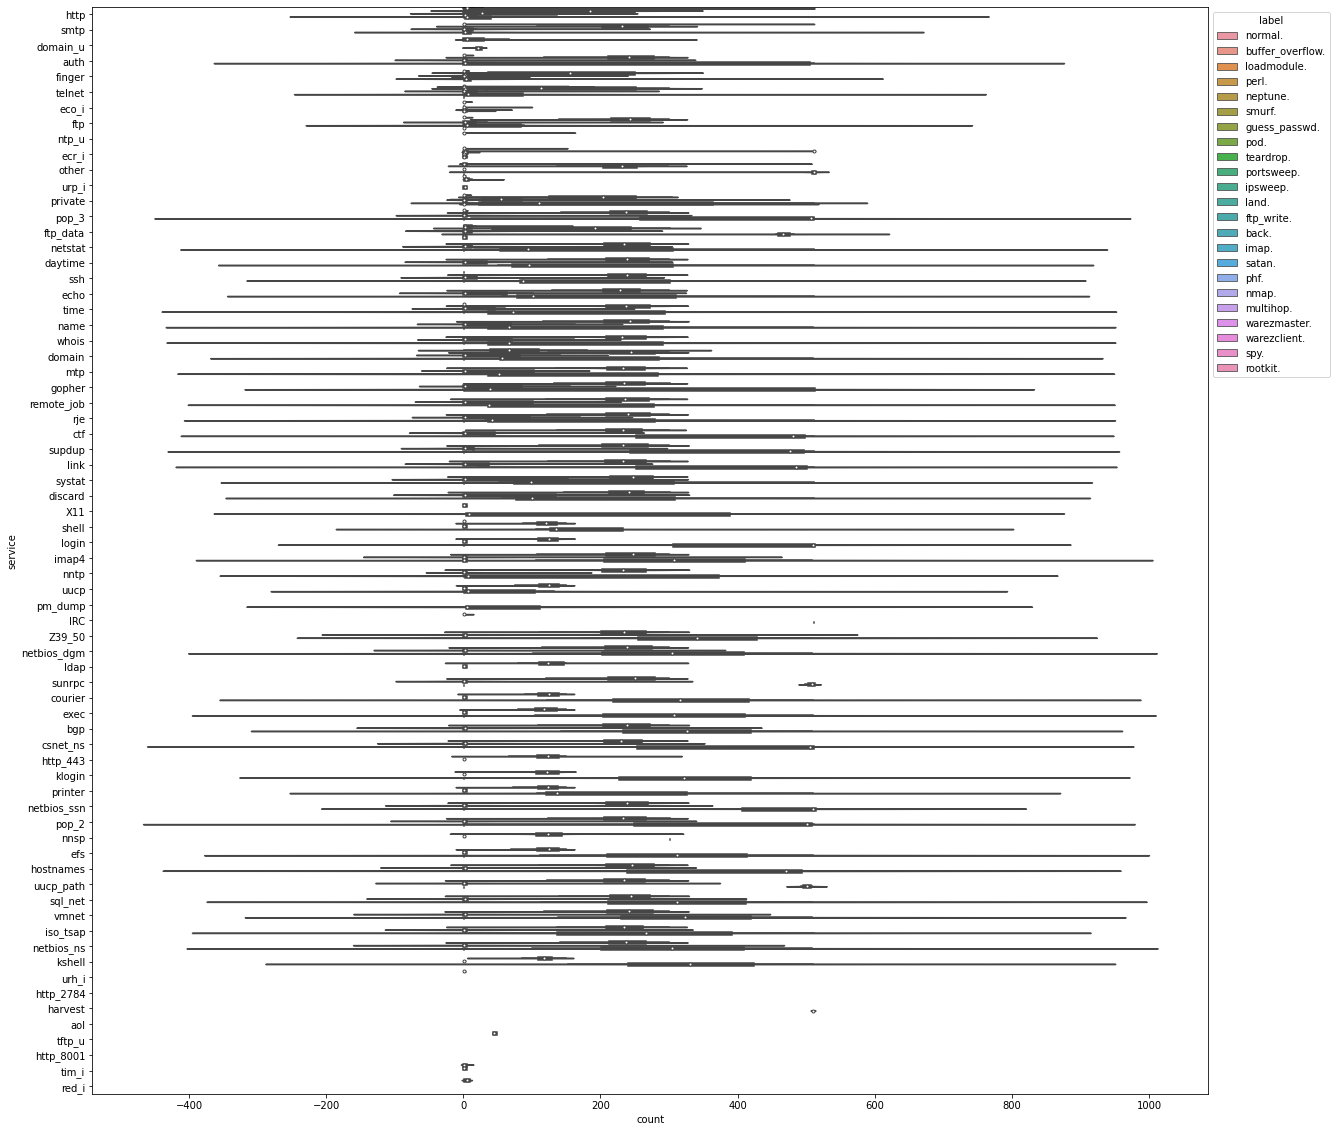

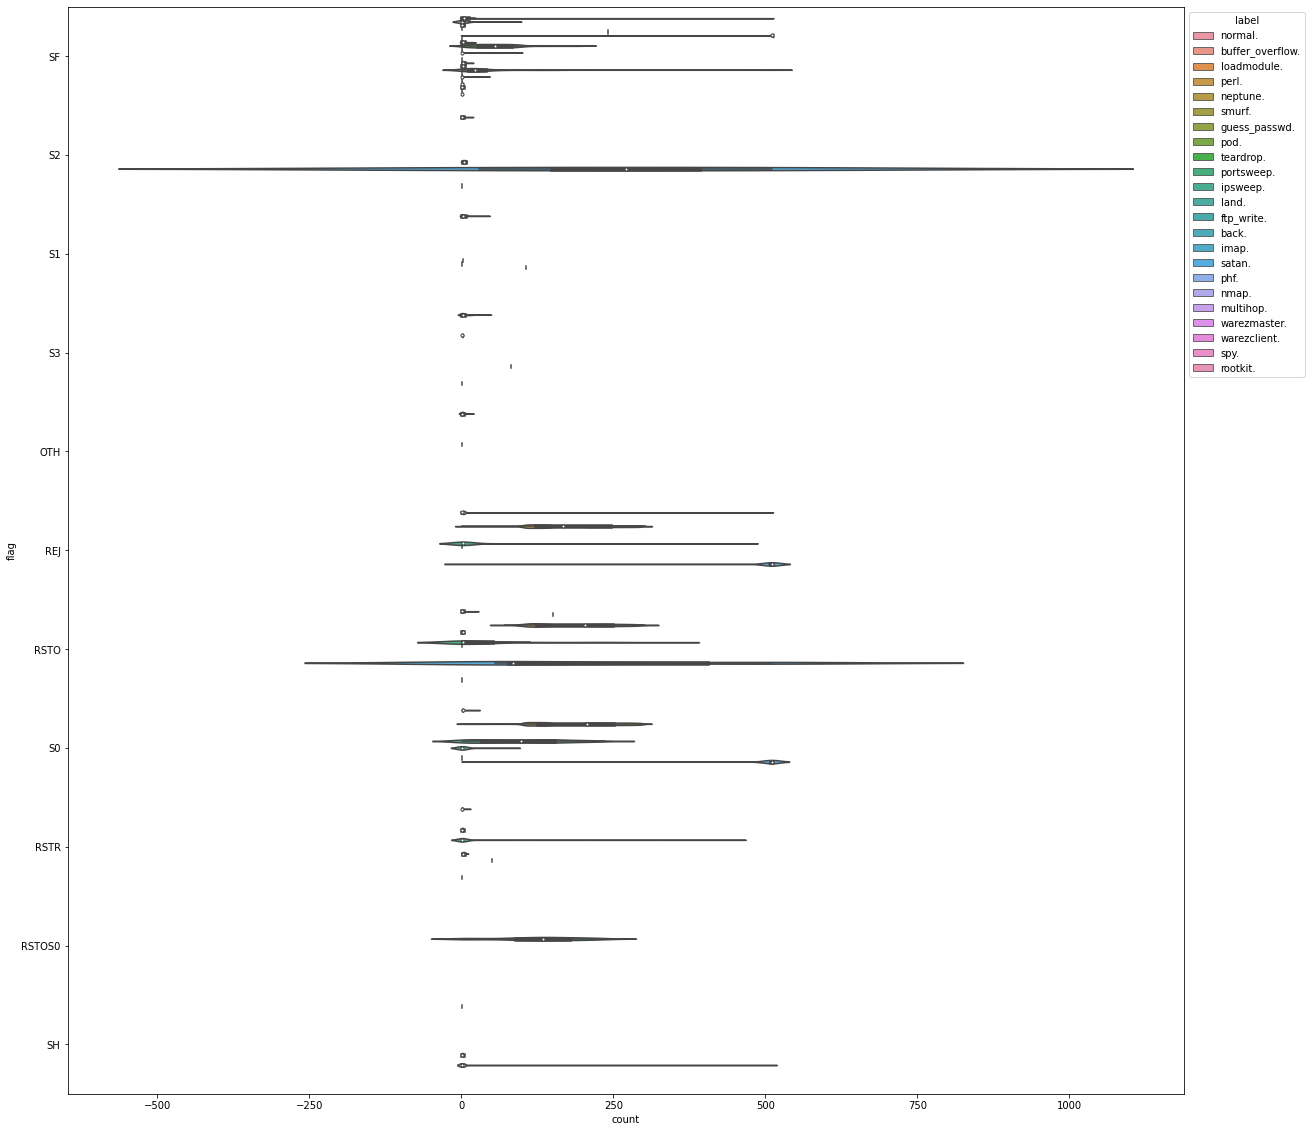

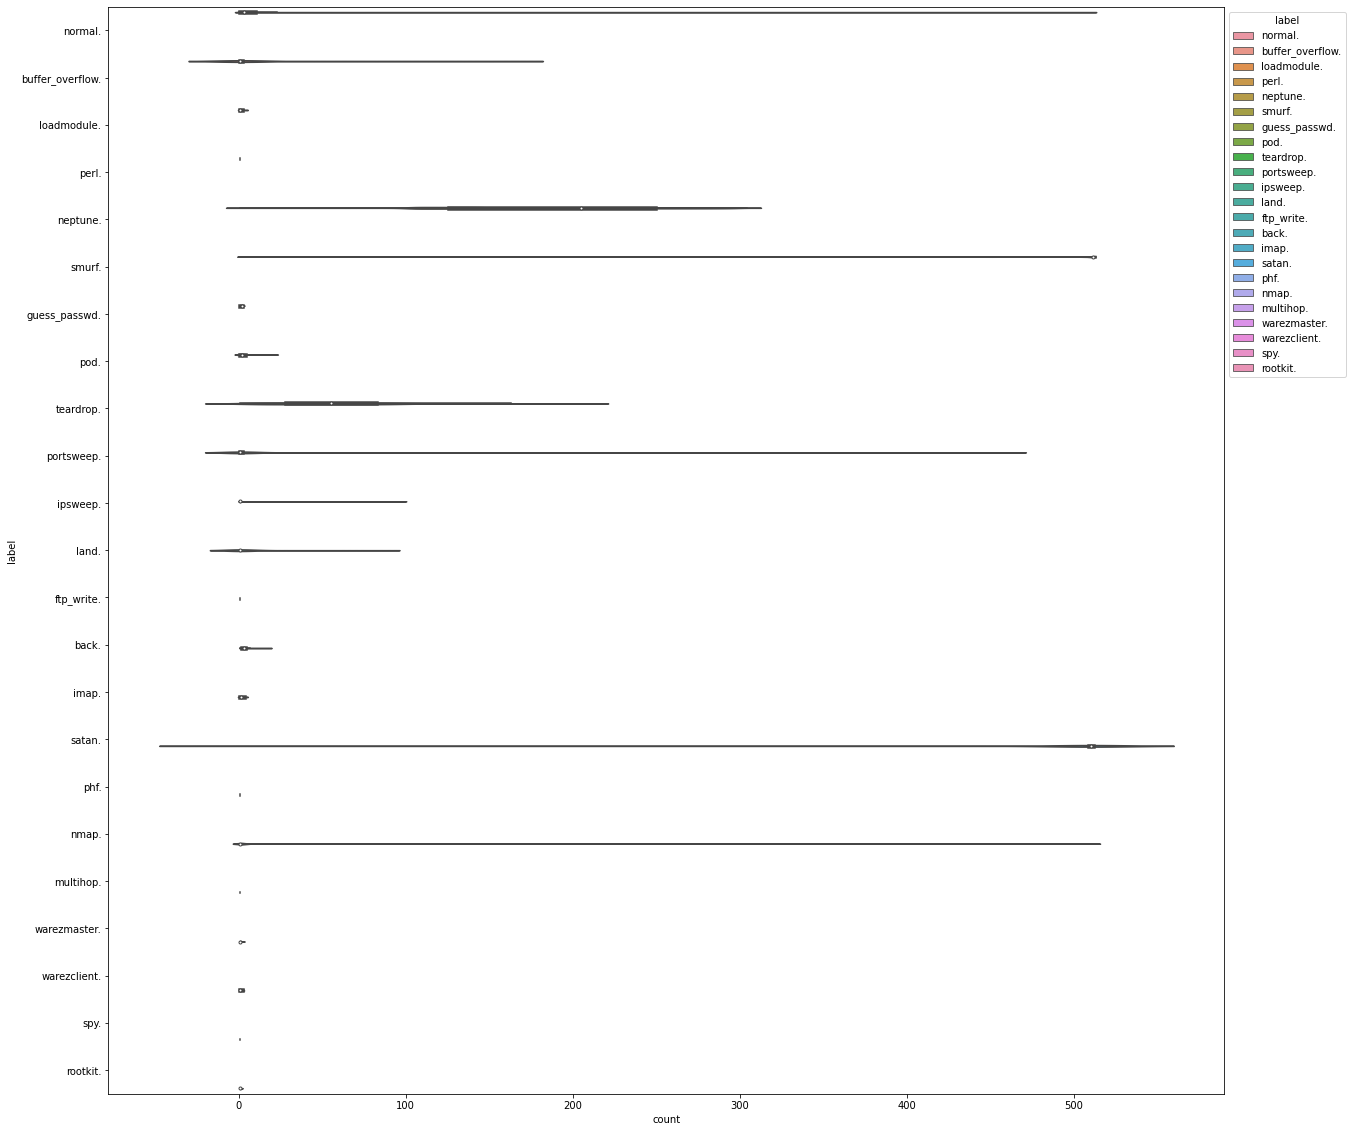

In [31]:
cnt=0
for i,y in enumerate(dst):
  for j,x in enumerate(cat_col):
      plt.figure(cnt+1)
      plt.figure(figsize = (20,20))
      ax=sns.violinplot(data=df, x=y, y=x,hue="label",scale="width")
      sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
      cnt+=1

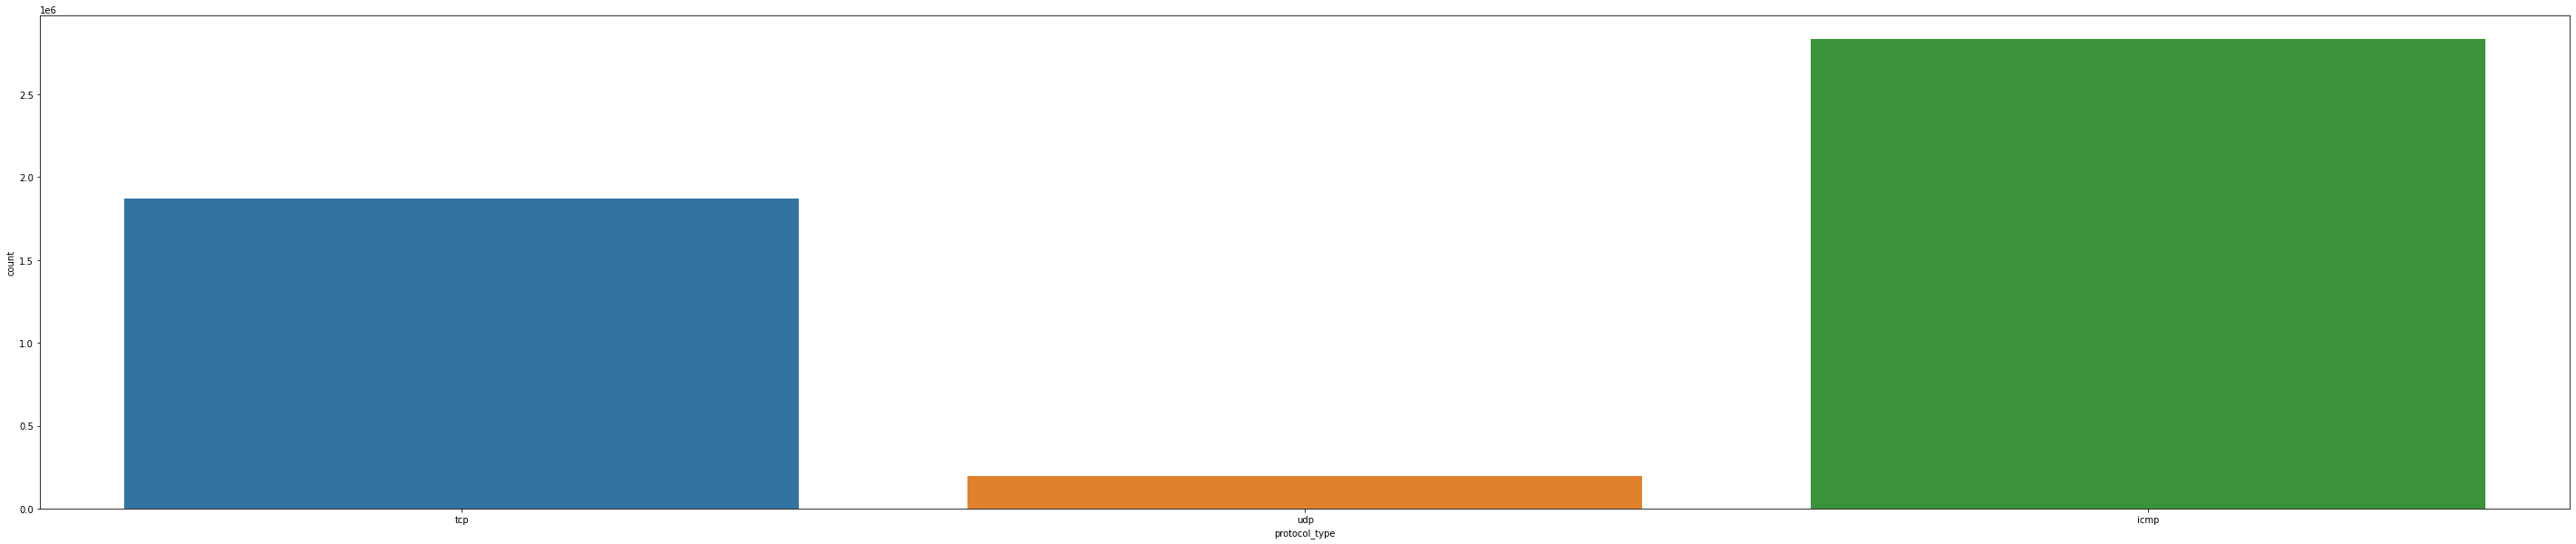

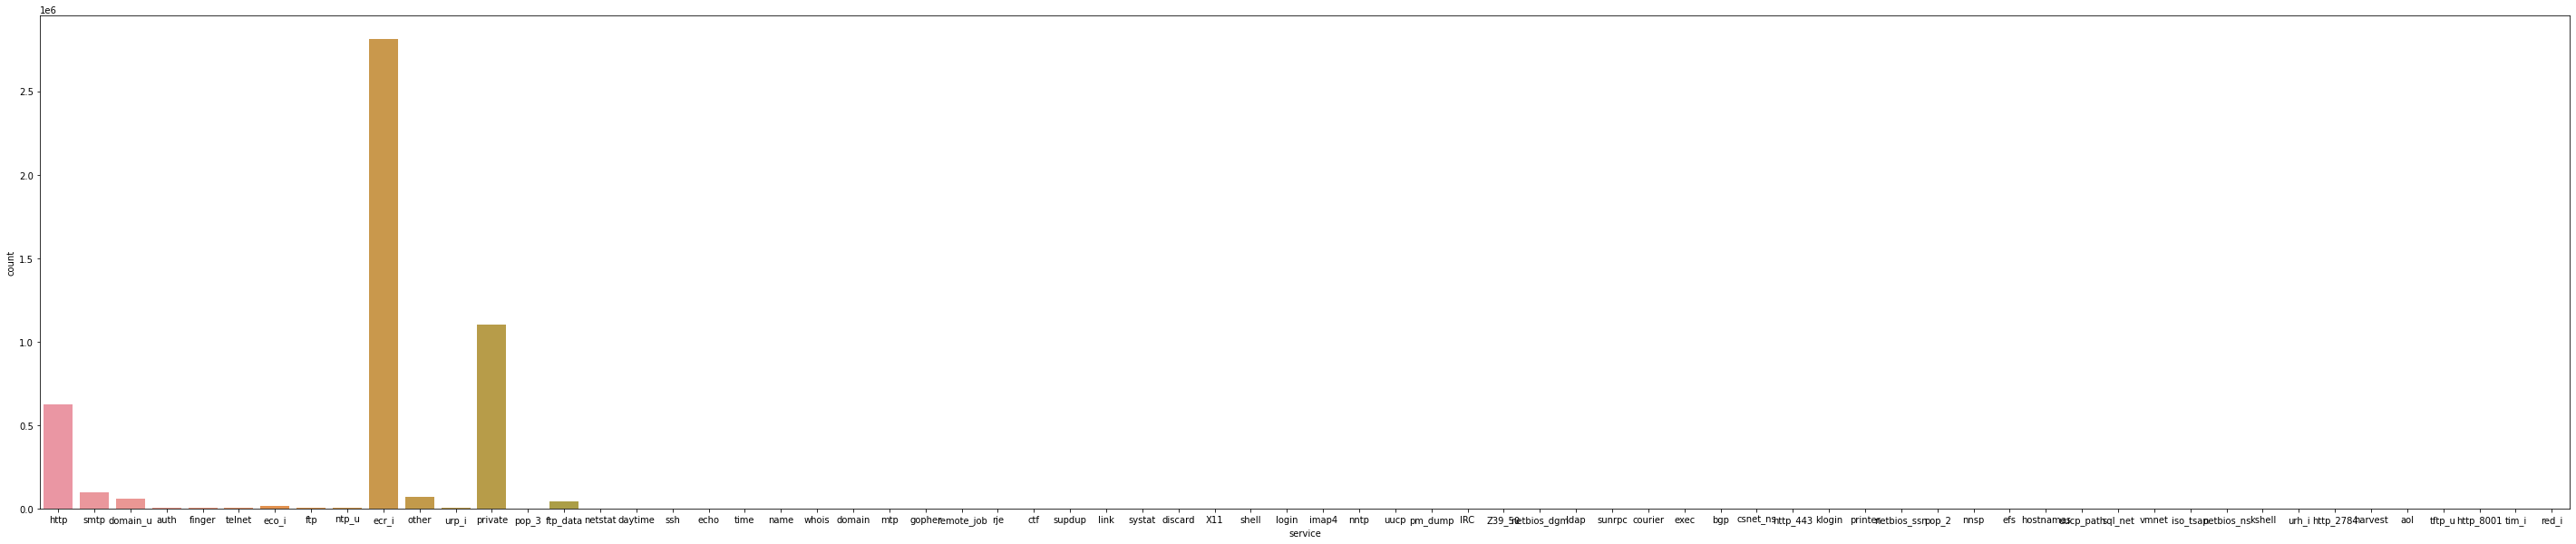

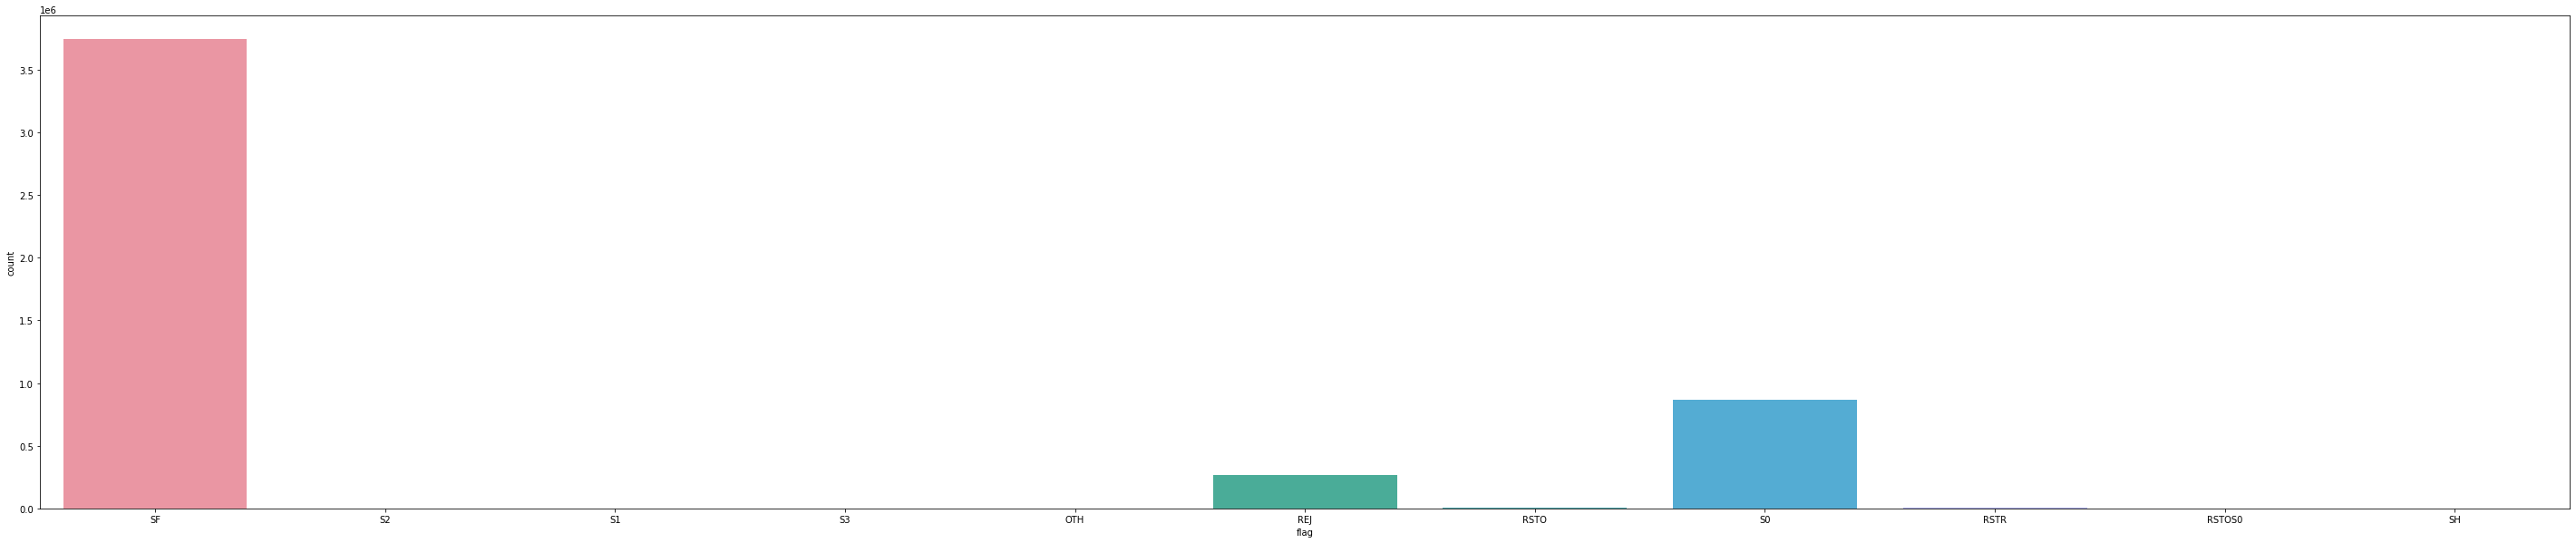

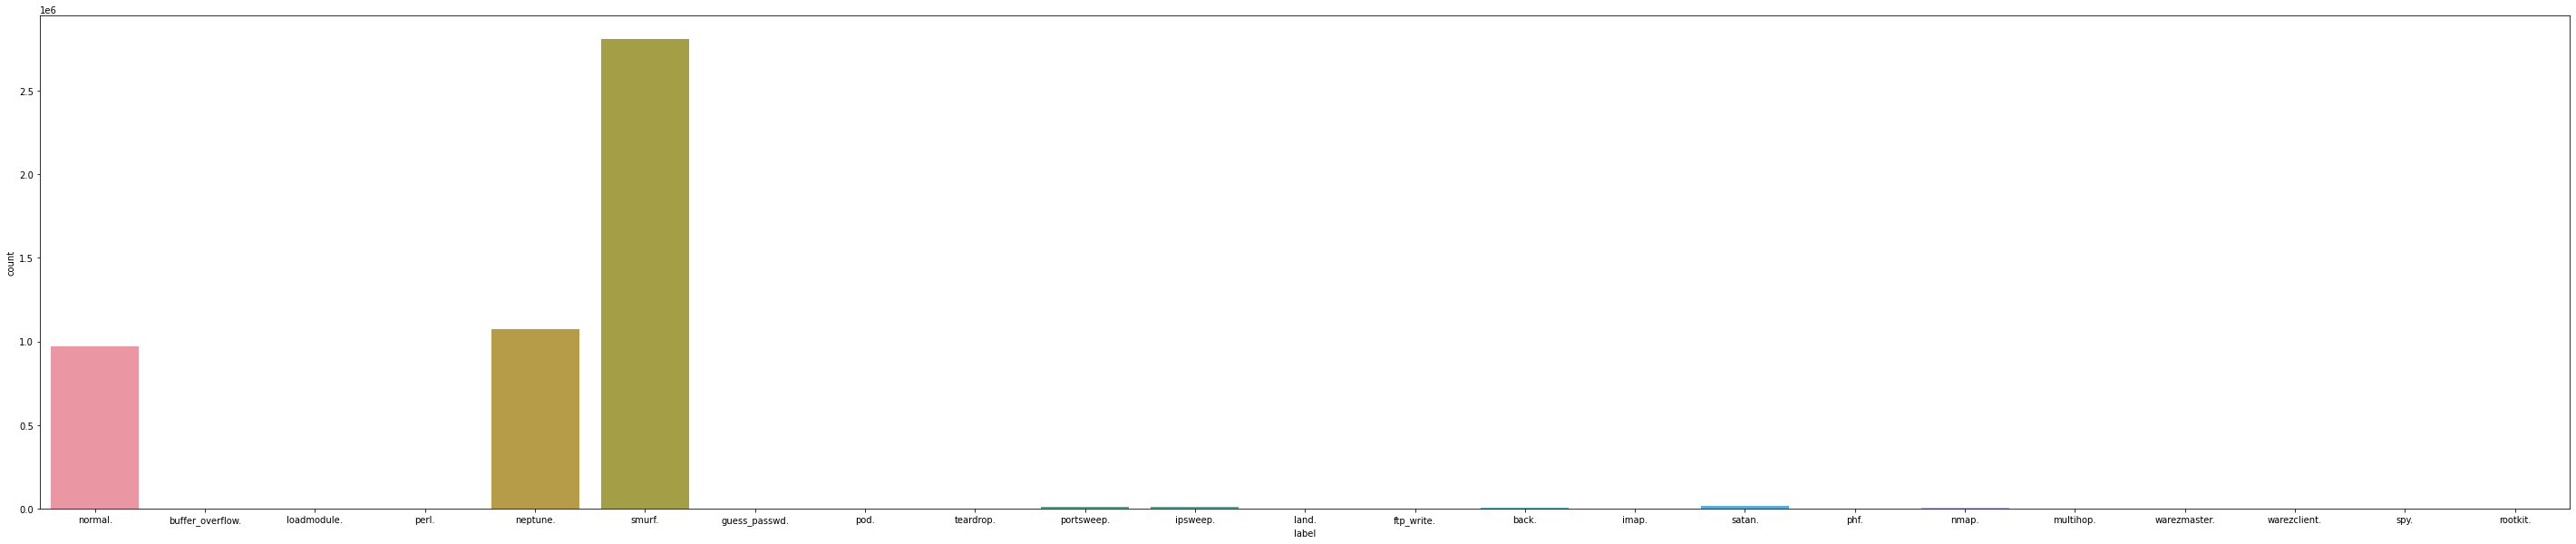

In [32]:

for j,x in enumerate(cat_col):
  plt.figure(figsize=(50,10))
  plt.figure(j+1)
  sns.countplot(x = x, data = df)
  
   